---
---
---
# CSC8635 Mini-projects
## Introduction

This document defines three project-style questions which go more deeply into different aspects of the module's content. You have to answer **ALL** of these project-stye questions.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with three different datasets each of a different nature:
1. A tabular dataset (defined as a classification problem)
2. A tabular dataset (defined as a regression problem)
3. A text dataset

Your job is easy to state: You should design a range of machine learning pipelines appropriate to the nature of each dataset. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report is expected to have 1000 to 2000 words. The word count excludes references, tables, figures, code blocks and section headers, and has a 10% leeway.

## Marking scheme

- Dataset exploration: 10 marks
- Methods: 30 marks
- Results of analysis: 30 marks
- Discussion: 20 marks
- Presentation (Writing Style, references, figures, etc.): 10 marks

This marking scheme will be applied separately to each mini-project. The overall mark will give 40% weight to mini-projects 1 and 2 (classification and regression) and 20% weight to mini-project 3 (NLP).

Some help for good marks:
- Split your work up into separate code blocks to help the reader understand what you have done.
- Provide text blocks, between code blocks, which help expalin what your code blocks are doing.
- It's not just about applying the first pipeline you find and using default hyperparameters but trying different pipelines and optimising the hyperparameters.
- We expect the solutions that you use to be based on the machine learning techniques you have been taught in the lectures/practicals.
- Note there are marks for presentation, so think about this both for the code, outputs and text you write.

Total number of word count : 2000

---
---
# Dataset 1: Classification

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/59112/files/8967354?wrap=1

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data normalisation
3. Split the data into training and test sets using cross-validation
4. Develop **four** machine learning pipelines for classifying the severity of the accident
5. Present the results for your pipelines using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

Some help for good marks:
- We expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models and hyperparameter tuning.


# **SOLUTION**

No of word count: 572

In [ ]:
!pip install ydata-profiling "pydantic<2.0" > /dev/null 2>&1
!pip install ydata-profiling==4.0.0 matplotlib==3.5.3 seaborn==0.11.2 > /dev/null 2>&1

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
from tabulate import tabulate
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from IPython.display import display
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from ydata_profiling import ProfileReport
from ipywidgets import widgets, interactive
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score,)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder

###**FLOWCHART**

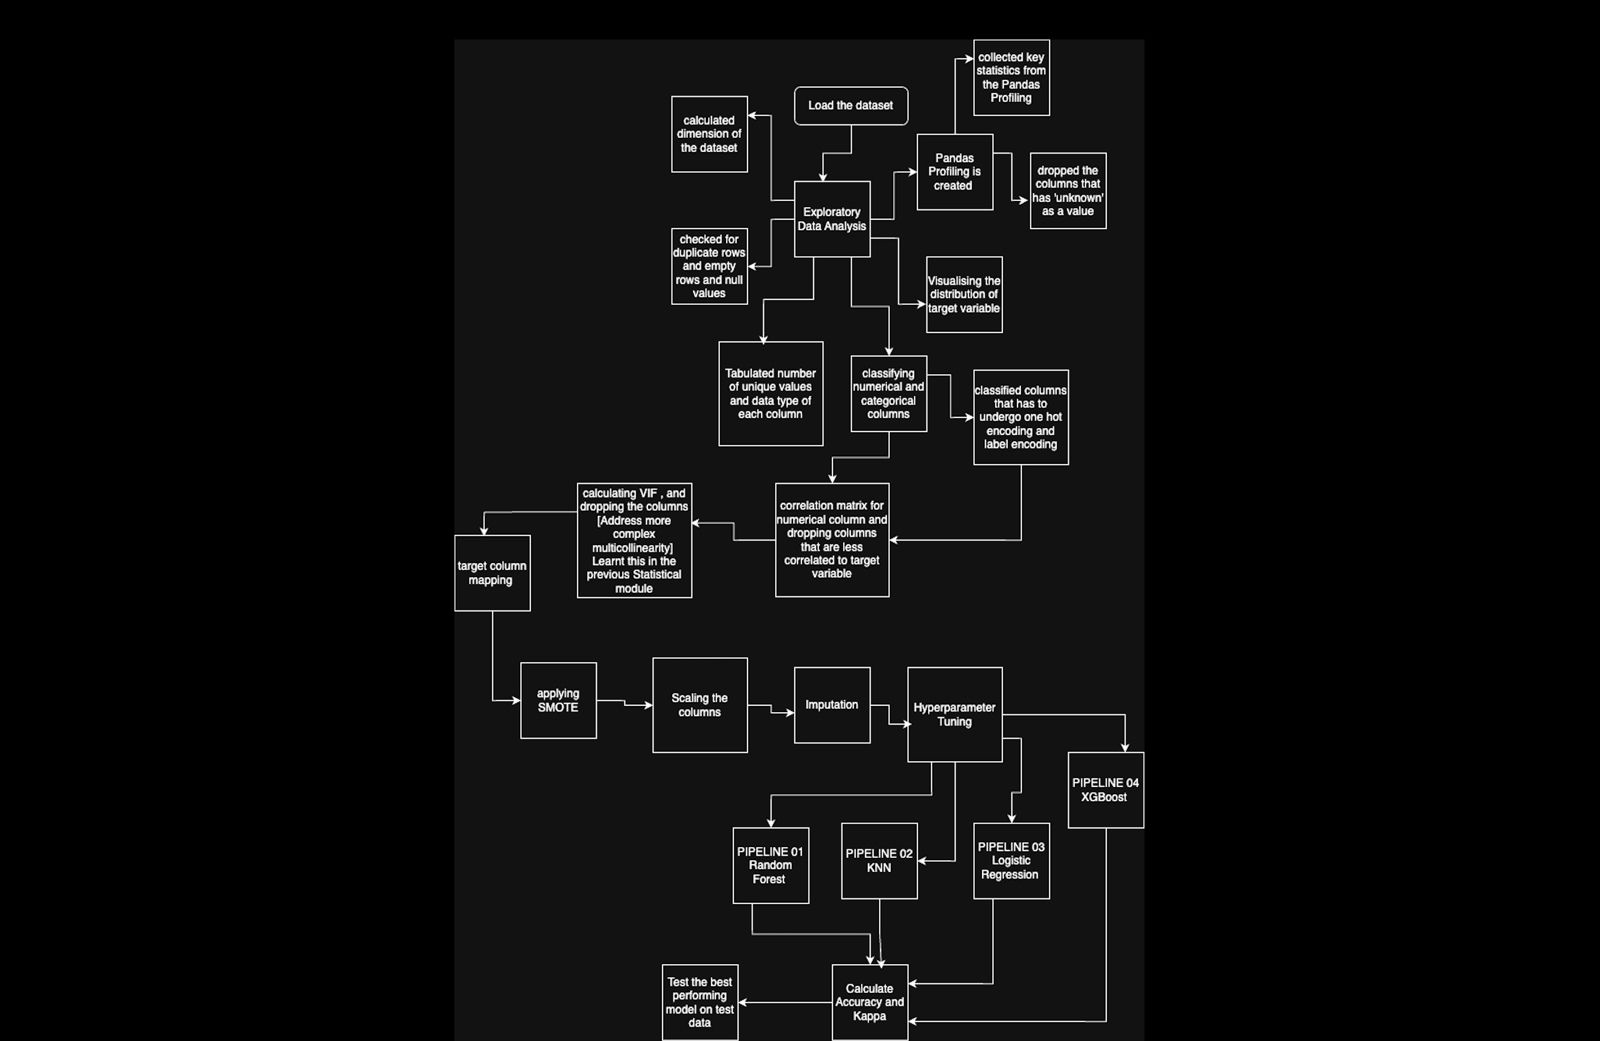

##**Exploratory Data Analysis**

In [ ]:
#Reading the dataset for this task
original_accident_dataset = pd.read_csv('/content/fars.csv', encoding='ISO-8859-1')

In [ ]:
#I am assigning original_accident_dataset to a new variable which i will processing further
accident_dataset = original_accident_dataset.copy()
#I am dropping the rows that is 'NA'
accident_dataset= accident_dataset.dropna()
#calculating the number of rows and columns
rows, cols = accident_dataset.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 100968 rows and 30 columns.


In [ ]:
#I am creating a report to analyse the dataset
profile = ProfileReport(
    accident_dataset,
    title="Pandas Profiling Report",
    html={'style': {'full_width': True}},
    minimal=True
)
profile.to_file(output_file="accident_classification.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

| **Feature**                      | **Issue**             | **Implication**                                          | **Action**                                 |
|----------------------------------|-----------------------|---------------------------------------------------------|--------------------------------------------|
| `CASE_STATE`                     | High Cardinality      | Increases model complexity                              | Use target encoding                        |
| `PERSON_TYPE`, `SEATING_POSITION`| Imbalance            | Bias in predictions                                     | Use sampling techniques or class weights   |
| `EJECTION`, `EXTRICATION`        | Imbalance            | Model might overlook minority cases                     | Apply class balancing methods              |
| `ALCOHOL_TEST_RESULT`            | Zeros (19.6%)         | May dilute feature effectiveness                        | Investigate zeros, impute if necessary     |
| `DRUG_TEST_RESULTS_(1_of_3)`     | Zeros (63.5%)         | High proportion of zeros could indicate missing values   | Handle missing values appropriately        |
| `RELATED_FACTOR_(1)`             | Imbalance (92.8%)     | Low variation                                           | Consider combining or removing the feature |
| `NON_MOTORIST_LOCATION`          | Imbalance (87.2%)     | Dominated by a single category                          | Bin categories or use class weighting      |
| `METHOD_ALCOHOL_DETERMINATION`   | Imbalance (67.1%)     | Bias in model predictions                               | Apply balancing techniques                 |
| `RACE`                           | Imbalance (61.2%)     | Could lead to biased predictions                        | Consider using class weights               |


📝 **Insights from the Report:**

With the report generated using Pandas Profiling,I identified that these insights highlight potential issues such as high cardinality, class imbalance, and a significant number of zero values in some features.

Addressing these issues will improve the performance and accuracy of any machine learning model built on this dataset.

📝 **Dataset Overview:**

The dataset contains 30 variables and 100,968 observations, with no missing values (0.0%). It is relatively lightweight, occupying 23.1 MiB in memory, and each record is 240.0 bytes on average.

The dataset includes 25 categorical variables and 5 numeric variables, offering a balance of qualitative and quantitative data for analysis.

In [ ]:
# Function to generate a descriptive summary of the dataset
def generate_description(df):
    summary = {
        "Column Name": df.columns,
        "Data Type": [df[col].dtype for col in df.columns],
        "Non-Null Count": df.count(),
    }
    return pd.DataFrame(summary)
#This will generate the Data type of each column and with number of non-null count
description_table = generate_description(accident_dataset)
left_part = description_table.iloc[:len(description_table)//2]
right_part = description_table.iloc[len(description_table)//2:]
left_part = left_part.reset_index(drop=True)
right_part = right_part.reset_index(drop=True)
combined_table = pd.concat([left_part, right_part], axis=1)
print(tabulate(combined_table, headers='keys', tablefmt='grid'))
#The number of non null values is to check if all the NA is dropped properly

+----+-------------------------------------+-------------+------------------+----------------------------------+-------------+------------------+
|    | Column Name                         | Data Type   |   Non-Null Count | Column Name                      | Data Type   |   Non-Null Count |
+====+=====================================+=============+==================+==================================+=============+==================+
|  0 | CASE_STATE                          | object      |           100968 | POLICE-REPORTED_DRUG_INVOLVEMENT | object      |           100968 |
+----+-------------------------------------+-------------+------------------+----------------------------------+-------------+------------------+
|  1 | AGE                                 | int64       |           100968 | METHOD_OF_DRUG_DETERMINATION     | object      |           100968 |
+----+-------------------------------------+-------------+------------------+----------------------------------+------------

In [ ]:
#Looking in the Pandas Profiling report, few columns has 'UnKnown' as a value.
#Aim is to filter out rows containing 'Unknown' in any column to clean the dataset, ensuring more reliable analysis
print("Original dataset shape:", accident_dataset.shape)
def filter_unknown_rows(df):
    return df[~df.apply(lambda row: row.astype(str).str.contains('unknown', case=False).any(), axis=1)]
accident_dataset = filter_unknown_rows(accident_dataset)
print("Filtered dataset shape:", accident_dataset.shape)
print("Number of rows with 'Unknown' in any column:",
      (accident_dataset.apply(lambda row: row.astype(str).str.contains('unknown', case=False).any(), axis=1)).sum())

Original dataset shape: (100968, 30)
Filtered dataset shape: (48660, 30)
Number of rows with 'Unknown' in any column: 0


### Visualizing the Distribution of Accident Severity

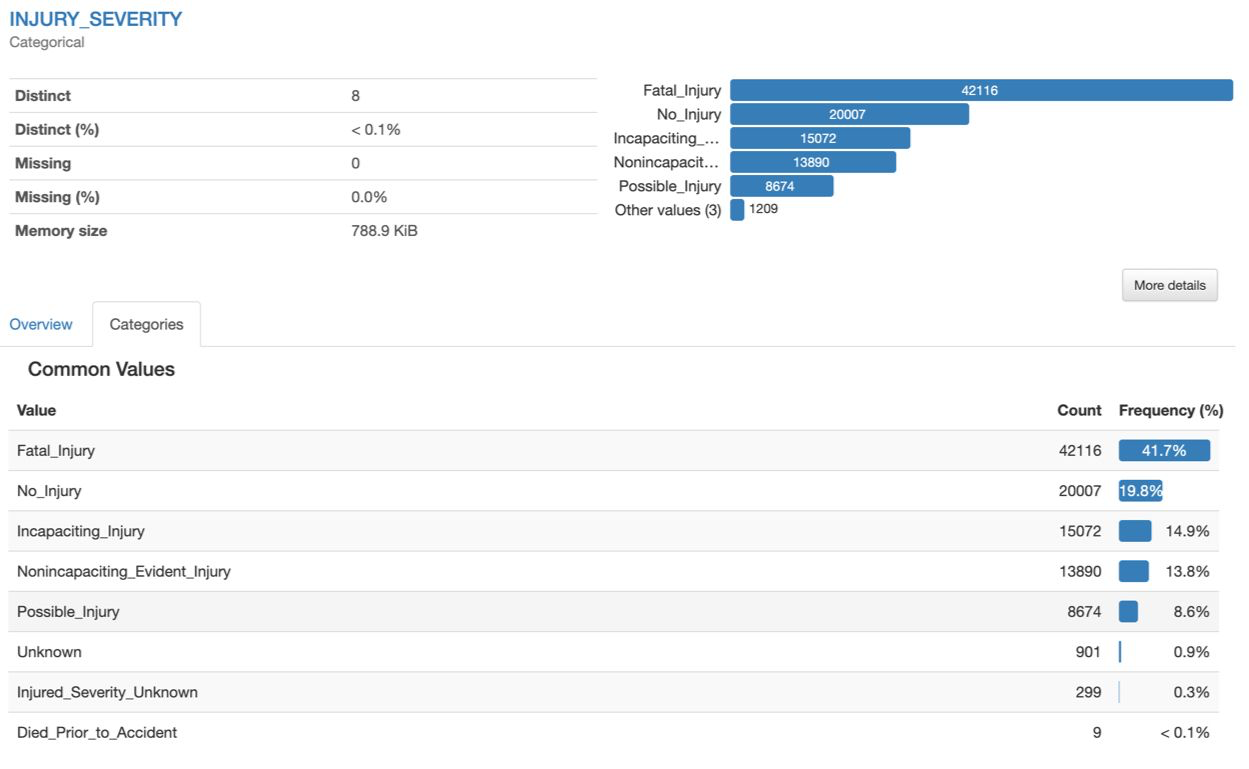


In [ ]:
# Droping rows that contribute much less for the target analysis
values_to_drop = ['Died_Prior_to_Accident', 'Injure_Severity_Unknown']
#Since unknown values are already dropped in previous step , I am considering only two unique values.
accident_dataset = accident_dataset[~accident_dataset['INJURY_SEVERITY'].isin(values_to_drop)]

The 'INJURY_SEVERITY' column, which serves as the target variable, is analyzed via interactive bar chart which helps in understanding the proportion of accidents with different severity levels and provides a clear view of the target variable's distribution, which is essential for further analysis or modeling.


In [ ]:
#By mapping the severity levels to more readable labels
severity_mapping = {
    'Fatal_Injury': 'Fatal Injury',
    'Incapaciting_Injury': 'Incapacitating Injury',
    'No_Injury': 'No Injury',
    'Possible_Injury': 'Possible Injury',
    'Nonincapaciting_Evident_Injury': 'Non-Incapacitating Injury',
}
accident_dataset['INJURY_SEVERITY'] = accident_dataset['INJURY_SEVERITY'].replace(severity_mapping)

In [ ]:
#I am making the bar chart interactive as you hover over it , the percentage and count and the label will be displayed
severity_counts = accident_dataset['INJURY_SEVERITY'].value_counts(normalize=True).reset_index()
severity_counts.columns = ['Severity', 'Percentage']
severity_counts['Count'] = accident_dataset['INJURY_SEVERITY'].value_counts().values
severity_counts['Percentage_Label'] = (severity_counts['Percentage'] * 100).round(2).astype(str) + '%'
fig = px.bar(
    severity_counts,
    x='Severity',
    y='Count',
    text='Percentage_Label',
    title='Distribution of Accident Severity',
    color='Severity',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Percentage: %{text}<extra></extra>',
    textposition='outside'
)
fig.update_layout(
    xaxis_title='Severity',
    yaxis_title='Count',
    showlegend=False  )
fig.show()

### Insights from Accident Severity Distribution

| Accident Severity               | Proportion |
|----------------------------------|------------|
| No Injury                       | 26.93%     |
| Fatal Injury                    | 23.27%     |
| Non-Incapacitating Injury       | 18.81%     |
| Incapacitating Injury           | 18.79%     |
| Possible Injury                 | 12.19%     |
| Died Before Accident            | 0.01%      |

These insights help in understanding accident severity, guiding safety interventions, and resource prioritization.



In [ ]:
#Label Encoding is applied to convert the target variable 'INJURY_SEVERITY' into numerical values,
#as I will be finding the correation between target and dependent variable
label_encoder = LabelEncoder()
accident_dataset['INJURY_SEVERITY'] = label_encoder.fit_transform(accident_dataset['INJURY_SEVERITY'])

In [ ]:
#Identifying the columns that are numerical and categorical to apply suitable encoding in future steps
numerical_columns = accident_dataset.select_dtypes(include=['int64'])
categorical_columns = accident_dataset.select_dtypes(include=['object'])
print("Updated Numerical Columns:", numerical_columns.columns)
print("Updated Categorical Columns:", categorical_columns.columns)

Updated Numerical Columns: Index(['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'INJURY_SEVERITY'],
      dtype='object')
Updated Categorical Columns: Index(['CASE_STATE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'POLICE-REPORTED_DRUG_INVOLVEMENT',
       'METHOD_OF_DRUG_DETERMINATION', 'DRUG_TEST_TYPE_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_TYPE_(3_of_3)', 'HISPANIC_ORIGIN',
       'TAKEN_TO_HOSPITAL', 'RELATED_FACTOR_(1)-PERSON_LEVEL',
       'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL',
       'RACE'],
      dtype='object')


###**Correlation for feature selction**:

In [ ]:
#Displaying corelation between the target and other numerical feature
numerical_columns = accident_dataset.select_dtypes(include=['int64'])
corr_matrix = numerical_columns.corr()
correlation_with_target = corr_matrix[['INJURY_SEVERITY']].reset_index()
correlation_with_target.columns = ['Feature', 'Correlation with Injury Severity']
#I am giving more readable labels
feature_name_mapping = {
    'AGE': 'Age',
    'ALCOHOL_TEST_RESULT': 'Alcohol Test Result',
    'DRUG_TEST_RESULTS_(1_of_3)': 'Drug Test Result (1 of 3)',
    'DRUG_TEST_RESULTS_(2_of_3)': 'Drug Test Result (2 of 3)',
    'DRUG_TEST_RESULTS_(3_of_3)': 'Drug Test Result (3 of 3)',
}

correlation_with_target['Feature'] = correlation_with_target['Feature'].map(feature_name_mapping).fillna(correlation_with_target['Feature'])
#I am removing the target variable from getting displayed
correlation_with_target = correlation_with_target[correlation_with_target['Feature'] != 'INJURY_SEVERITY']
display(correlation_with_target)

,Feature,Correlation with Injury Severity
0,Age,-0.142476
1,Alcohol Test Result,0.349409
2,Drug Test Result (1 of 3),-0.156209
3,Drug Test Result (2 of 3),-0.098212
4,Drug Test Result (3 of 3),-0.066148



Based on the correlation analysis, I am retaining the features that show a moderate to stro0ng correlation with the target variable(**Injury Severity**).

Features like the **Age, Drug Test Results (1 of 3, 2 of 3, 3 of 3)** show weak or negligible correlations with the target, and thus, will be dropped for further analysis to simplify the model and reduce noise.

This step aims to focus on the most relevant predictors for better model performance.


In [ ]:
columns_to_drop = ['AGE', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)']
accident_dataset.drop(columns=columns_to_drop, inplace=True)
print(list(accident_dataset.columns))

['CASE_STATE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION', 'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION', 'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION', 'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION', 'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT', 'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION', 'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)', 'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL', 'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'INJURY_SEVERITY']


I'm performing feature [1] encoding to convert categorical columns into numerical representations:

Columns with more than 10 unique values are suggested for frequency or target encoding,
while those with 10 or fewer unique values are recommended for one-hot encoding.

In [ ]:
unique_values_count = categorical_columns.nunique()
encoding_suggestions = {
    'Column': unique_values_count.index,
    'Unique Count': unique_values_count.values,
    'Encoding Suggestion': [
        'Frequency Encoding / Target Encoding' if unique_count > 10 else
        'One-Hot Encoding' for unique_count in unique_values_count.values
    ]
}
encoding_df = pd.DataFrame(encoding_suggestions)
display(encoding_df)

,Column,Unique Count,Encoding Suggestion
0,CASE_STATE,51,Frequency Encoding / Target Encoding
1,SEX,2,One-Hot Encoding
2,PERSON_TYPE,8,One-Hot Encoding
3,SEATING_POSITION,21,Frequency Encoding / Target Encoding
4,RESTRAINT_SYSTEM-USE,10,One-Hot Encoding
5,AIR_BAG_AVAILABILITY/DEPLOYMENT,11,Frequency Encoding / Target Encoding
6,EJECTION,3,One-Hot Encoding
7,EJECTION_PATH,9,One-Hot Encoding
8,EXTRICATION,2,One-Hot Encoding
9,NON_MOTORIST_LOCATION,13,Frequency Encoding / Target Encoding



✅ This transformation helps prepare the data for machine learning algorithms by converting categorical variables into numerical representations.


In [ ]:
one_hot_columns = ['SEX', 'RESTRAINT_SYSTEM-USE', 'EJECTION','EJECTION_PATH', 'EXTRICATION', 'PERSON_TYPE',
                   'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION','ALCOHOL_TEST_TYPE',
                   'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
                   'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL','DRUG_TEST_TYPE_(3_of_3)','DRUG_TEST_TYPE_(2_of_3)','DRUG_TEST_TYPE_(1_of_3)']

freq_encoding_columns = ['CASE_STATE', 'SEATING_POSITION', 'AIR_BAG_AVAILABILITY/DEPLOYMENT',
                         'NON_MOTORIST_LOCATION', 'RELATED_FACTOR_(1)-PERSON_LEVEL',
                         'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE']
# one hot encoding is done for the columns in 'one_hot_columns'
encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = encoder.fit_transform(accident_dataset[one_hot_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(one_hot_columns))
accident_dataset = pd.concat([accident_dataset, one_hot_encoded_df], axis=1)
accident_dataset.drop(columns=one_hot_columns, inplace=True)
#Performing frequency encoding for the specific columns in 'freq_encoding_columns'
for col in freq_encoding_columns:
    freq_map = accident_dataset[col].value_counts().to_dict()
    accident_dataset[col] = accident_dataset[col].map(freq_map)
accident_dataset.head()

,CASE_STATE,SEATING_POSITION,AIR_BAG_AVAILABILITY/DEPLOYMENT,NON_MOTORIST_LOCATION,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3),RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,...,DRUG_TEST_TYPE_(3_of_3)_Other_Type_Test,DRUG_TEST_TYPE_(3_of_3)_Urine_Test,DRUG_TEST_TYPE_(2_of_3)_Both:_Blood_and_Urine_(Since_1993),DRUG_TEST_TYPE_(2_of_3)_Not_Tested_for_Drugs,DRUG_TEST_TYPE_(2_of_3)_Other_Type_Test,DRUG_TEST_TYPE_(2_of_3)_Urine_Test,DRUG_TEST_TYPE_(1_of_3)_Both:_Blood_and_Urine_(Since_1993),DRUG_TEST_TYPE_(1_of_3)_Not_Tested_for_Drugs,DRUG_TEST_TYPE_(1_of_3)_Other_Type_Test,DRUG_TEST_TYPE_(1_of_3)_Urine_Test
2,863.0,25750.0,30588.0,46788.0,96.0,0.0,0.0,47567.0,48350.0,48597.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,863.0,10845.0,30588.0,46788.0,96.0,0.0,0.0,47567.0,48350.0,48597.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,863.0,25750.0,30588.0,46788.0,96.0,0.0,0.0,47567.0,48350.0,48597.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,863.0,25750.0,30588.0,46788.0,96.0,0.0,0.0,47567.0,48350.0,48597.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10,863.0,25750.0,7444.0,46788.0,96.0,0.0,0.0,47567.0,48350.0,48597.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Identifies and prints the features with a correlation higher than the specified threshold (0.1) with the target variable 'INJURY_SEVERITY'.
correlation_threshold = 0.1
correlation_matrix = accident_dataset.corr()
target_correlation = correlation_matrix['INJURY_SEVERITY']
relevant_features = target_correlation[target_correlation.abs() > correlation_threshold].index.tolist()
relevant_features.remove('INJURY_SEVERITY')
print("Columns to consider for classification:", relevant_features)

Columns to consider for classification: ['CASE_STATE', 'NON_MOTORIST_LOCATION', 'ALCOHOL_TEST_RESULT', 'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RACE']


In [ ]:
#Columns to consider for classification
columns_to_retain =  ['CASE_STATE', 'NON_MOTORIST_LOCATION', 'ALCOHOL_TEST_RESULT', 'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RACE','INJURY_SEVERITY']
accident_dataset = accident_dataset[columns_to_retain]

###**Multicollinearity Check:**

I'm calculating the Variance Inflation Factor (VIF) to further detect multicollinearity between features, as correlation alone may not fully capture all relationships, a concept I learned in the previous module on statistics.


In [ ]:
accident_dataset = accident_dataset.fillna(accident_dataset.mean())

# Step 2: Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    # Adding recommendations based on VIF values
    vif_data["Recommendation"] = vif_data["VIF"].apply(lambda x:
        "Keep (No multicollinearity)" if x < 5 else
        "Investigate (Moderate multicollinearity)" if 5 <= x < 10 else
        "Drop (High multicollinearity)"
    )

    return vif_data

# Step 3: Calculate VIF for the selected features
vif_result = calculate_vif(accident_dataset.drop(columns=['INJURY_SEVERITY']))

# Step 4: Print VIF result as a formatted table
print(tabulate(vif_result, headers='keys', tablefmt='grid', showindex=False))

+---------------------------------+----------+------------------------------------------+
| Feature                         |      VIF | Recommendation                           |
+=================================+==========+==========================================+
| CASE_STATE                      |  3.99003 | Keep (No multicollinearity)              |
+---------------------------------+----------+------------------------------------------+
| NON_MOTORIST_LOCATION           | 84.3885  | Drop (High multicollinearity)            |
+---------------------------------+----------+------------------------------------------+
| ALCOHOL_TEST_RESULT             |  8.30501 | Investigate (Moderate multicollinearity) |
+---------------------------------+----------+------------------------------------------+
| RELATED_FACTOR_(1)-PERSON_LEVEL | 90.9507  | Drop (High multicollinearity)            |
+---------------------------------+----------+------------------------------------------+
| RACE    

In [ ]:
# Drop highly collinear features based on VIF results
columns_to_drop = ['NON_MOTORIST_LOCATION', 'RELATED_FACTOR_(1)-PERSON_LEVEL']
accident_dataset = accident_dataset.drop(columns=columns_to_drop)
print("Remaining Columns:", accident_dataset.columns.tolist())

Remaining Columns: ['CASE_STATE', 'ALCOHOL_TEST_RESULT', 'RACE', 'INJURY_SEVERITY']


In [ ]:
# Printing the distribution of the target variable 'INJURY_SEVERITY' to understand the class balance in the dataset.
print(accident_dataset['INJURY_SEVERITY'].value_counts())

1.778691    25284
2.000000    13104
0.000000    11322
3.000000     9152
1.000000     9144
4.000000     5934
Name: INJURY_SEVERITY, dtype: int64


##**Target Variable Mapping and SMOTE for Class Imbalance:**

I'm applying SMOTE [2] to address class imbalance as per the insights from EDA, by oversampling the minority classes, ensuring a balanced dataset for better model performance.

This step helps improve the model's ability to generalize and avoid bias towards the majority class.


In [ ]:
# Drop the target variable from features
y = accident_dataset['INJURY_SEVERITY'].astype(int)
X = accident_dataset.drop(columns=['INJURY_SEVERITY'])

# Class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
1    34428
2    13104
0    11322
3     9152
4     5934
Name: INJURY_SEVERITY, dtype: int64
Class distribution after SMOTE:
0    34428
1    34428
2    34428
4    34428
3    34428
Name: INJURY_SEVERITY, dtype: int64


In [ ]:
accident_dataset.columns

Index(['CASE_STATE', 'ALCOHOL_TEST_RESULT', 'RACE', 'INJURY_SEVERITY'], dtype='object')

##**Feature Scaling:**

I'm applying feature scaling using StandardScaler to standardize the selected columns, ensuring they have a mean of 0 and variance of 1.

This step improves model performance by eliminating the bias introduced by differing scales of features this is also done after insights from the report.


In [ ]:
# Listing of all columns to scale
columns_to_scale = ['CASE_STATE', 'ALCOHOL_TEST_RESULT', 'RACE']
scaler = StandardScaler()
X_scaled = accident_dataset.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])

###**Imputation of Missing Values (Mean Imputation):**

I'm filling missing numerical values with the mean of each respective column to prevent data loss and ensure a complete dataset for model training.


In [ ]:
# imputation (mean imputation for numerical columns)
accident_dataset.fillna(accident_dataset.mean(), inplace=True)

##**Hyperparameter Tuning Overview:**

By performing hyperparameter tuning, I ensured that each model was optimized to achieve the best possible results for the given dataset. But I did not add the snippet here as it took me too long for its execution.

 This process involves adjusting key hyperparameters to optimize the model's performance. Specifically, for each model, I explored different values for parameters such as:

- `n_estimators` (number of trees in Random Forest and XGBoost)
- `max_depth` (maximum depth of trees)
- `n_neighbors` (number of neighbors in KNN)
- `C` (regularization strength in Logistic Regression)
  
These hyperparameters were selected to achieve the best possible accuracy and model performance. The goal was to improve the model's predictive power while minimizing issues such as overfitting and underfitting.


###**PIPELINE:**

In [ ]:
#Based on the hyperpramater tuning
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=None, random_state=42
    ),
    'KNN': KNeighborsClassifier(
        weights='uniform', n_neighbors=11, metric='manhattan', algorithm='auto'
    ),
    'Logistic Regression': LogisticRegression(
        solver='saga', max_iter=1000, penalty='l2', C=100.0, random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42
    )
}

# StratifiedKFold setup (for classification)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results for each model
model_results = {}

for model_name, model in models.items():
    accuracies = []
    kappas = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, test_index in kf.split(X, y):
        # Split the data
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Standardize and apply PCA
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_test_fold_scaled = scaler.transform(X_test_fold)
        pca = PCA(n_components=0.95)
        X_train_fold_pca = pca.fit_transform(X_train_fold_scaled)
        X_test_fold_pca = pca.transform(X_test_fold_scaled)

        # Train the model
        model.fit(X_train_fold_pca, y_train_fold)
        y_pred = model.predict(X_test_fold_pca)

        # Calculate metrics
        accuracies.append(accuracy_score(y_test_fold, y_pred))
        kappas.append(cohen_kappa_score(y_test_fold, y_pred))
        precisions.append(precision_score(y_test_fold, y_pred, average='weighted', zero_division=0))
        recalls.append(recall_score(y_test_fold, y_pred, average='weighted', zero_division=0))
        f1_scores.append(f1_score(y_test_fold, y_pred, average='weighted', zero_division=0))

    # Store average metrics
    model_results[model_name] = {
        'Average Accuracy': np.mean(accuracies),
        'Average Kappa': np.mean(kappas),
        'Average Precision': np.mean(precisions),
        'Average Recall': np.mean(recalls),
        'Average F1-Score': np.mean(f1_scores),
    }

# Print the results
for model_name, results in model_results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in results.items():
        print(f"  {metric_name}: {metric_value:.4f}")

Random Forest:
  Average Accuracy: 0.6897
  Average Kappa: 0.5612
  Average Precision: 0.6982
  Average Recall: 0.6897
  Average F1-Score: 0.6659
KNN:
  Average Accuracy: 0.6671
  Average Kappa: 0.5232
  Average Precision: 0.6541
  Average Recall: 0.6671
  Average F1-Score: 0.6506
Logistic Regression:
  Average Accuracy: 0.6734
  Average Kappa: 0.5463
  Average Precision: 0.6577
  Average Recall: 0.6734
  Average F1-Score: 0.6358
XGBoost:
  Average Accuracy: 0.6888
  Average Kappa: 0.5622
  Average Precision: 0.7056
  Average Recall: 0.6888
  Average F1-Score: 0.6670


##**Conclusion:**

## 📊 Model Comparison Table

| **Model**              | **Accuracy** | **Kappa** | **Precision** | **Recall** | **F1-Score** | **Remarks**                                                  |
|------------------------|--------------|-----------|---------------|------------|--------------|--------------------------------------------------------------|
| **Random Forest**       | 68.97%       | 0.5612    | 69.82%        | 68.97%     | 66.59%       | Best performer; robust and handles the dataset well.         |
| **XGBoost**             | 68.88%       | 0.5622    | 70.56%        | 68.88%     | 66.70%       | Strong performance; comparable to Random Forest.             |
| **KNN**                 | 66.71%       | 0.5232    | 65.41%        | 66.71%     | 65.06%       | Decent performance; slightly behind Random Forest & XGBoost. |
| **Logistic Regression** | 67.34%       | 0.5463    | 65.77%        | 67.34%     | 63.58%       | Performs reasonably well; less flexible with complex data.   |

Given the data imbalance, the 69% accuracy indicates that the models are capturing meaningful patterns despite class disparities.


### Best Models:
- **XGBoost**: Best performing model with a slightly higher accuracy and kappa than Random Forest.
- **Random Forest**: Very similar to XGBoost but slightly behind in terms of accuracy and kappa.

Their ability to handle non-linear relationships and complex interactions between features is outstanding. They also managed class imbalance effectively with the help of SMOTE. KNN showed decent performance but lagged behind, while Logistic Regression struggled due to its simplicity and inability to capture complex patterns.


#References:

[1] R. Karthiga, G. Usha, N. Raju and K. Narasimhan, "Transfer Learning Based Breast cancer Classification using One-Hot Encoding Technique," 2021 International Conference on Artificial Intelligence and Smart Systems (ICAIS), Coimbatore, India, 2021, pp. 115-120, doi: 10.1109/ICAIS50930.2021.9395930. keywords: {Training;Solid modeling;Transfer learning;Breast cancer;Encoding;Cancer;Testing;Breast cancer;One-hot encoding;Deep neural network;Transfer learning;VGG-16},

[2] Y. Bao and S. Yang, "Two Novel SMOTE Methods for Solving Imbalanced Classification Problems," in IEEE Access, vol. 11, pp. 5816-5823, 2023, doi: 10.1109/ACCESS.2023.3236794.
keywords: {Cancer;Training data;Machine learning;Machine learning algorithms;Data processing;Viruses (medical);Imbalanced classification problems;IO-SMOTE method;CP-SMOTE method;machine learning},






---
---
# Dataset 2: Regression

In this part of the coursework you are going to look at a regession problem - predicting the growth rate of a bacteria. The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc..) to compute a growth curve for the bacteria - represented by the variables 'a', 'mu', 'tau' and 'a0'. Your job is to predict the results of the experiment - 'a', 'mu', 'tau' and 'a0' (these are the growth-rate parameters for the bacteria, but you don't need to understand the details to do the coursework).

The dataset is available from https://ncl.instructure.com/courses/59112/files/8967383?wrap=1

The CSV contains 9 fields as follows:

| variable | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen (Target variable) |
| mu | Growth rate of bacteria (Target variable) |
| tau | Time delay before bacteria starts growing (Target variable) |
| a0 | Initial level of bacteria (Target variable) |

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data normalisation
3. Split the data into train/test/validate
4. Develop **four** machine learning pipelines for predicting 'a', 'mu', 'tau' and 'a0'. This should include hyperparameter tuning. Note: This is not four pipelines one for 'a' one for 'mu'... but four pipelines for 'a', four for 'mu'...
5. Present the results for your pipelines using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

Some help for good marks:
- Make sure that when you predict 'a' you don't have 'mu', 'tau' or 'a0' in your features - this would make it very easy to predict but be compleatly wrong.
- Remember that this is a **regression** problem and use models that are appropriate for this.
- Hyperparameters can be crucial to get good results here.

#**SOLUTION**

No of word count : 823

Total pipelie: 4 for each target variable hence 16 in total

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from ipywidgets import widgets, interactive
from IPython.display import display
from tabulate import tabulate
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import skew, kurtosis
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
bacteria_data = pd.read_csv('/content/fitting-results.csv', encoding='ISO-8859-1')
rows, cols = bacteria_data.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 19992 rows and 9 columns.


## **PIPELINE 01**

No of word count : 345

###**EXPLORATORY DATA ANALYSIS**





In [ ]:
#preparing the data by removing the 'mu', 'tau', and 'a0' columns as they are not required for our analysis for the first pipeline
bacteria_data_pipeline_01 = bacteria_data.drop(columns=['mu', 'tau', 'a0'])
#check for any missing values in the remaining columns to ensure the data is clean before further processing.
null_counts = bacteria_data_pipeline_01.isnull().sum()
table_data = [["Column Name", "Null Count"]]
table_data.extend([[col, count] for col, count in null_counts.items()])
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+---------------+--------------+
| Column Name   |   Null Count |
+===============+==============+
| n_cyanos      |            0 |
+---------------+--------------+
| co2           |            0 |
+---------------+--------------+
| light         |            0 |
+---------------+--------------+
| SucRatio      |            0 |
+---------------+--------------+
| Nsample       |            0 |
+---------------+--------------+
| a             |            0 |
+---------------+--------------+



The above following table shows there are no number of null values in each of the remaining columns.

### Providing an interactive way to explore column statistics

An interactive dropdown widget allows selecting a column to view its summary statistics, helping understand the distribution and properties of the data for each feature.


In [ ]:
column_selector = widgets.Dropdown(
    options=bacteria_data_pipeline_01.columns,
    description="Select Column:",
    style={'description_width': '120px'},
    layout=widgets.Layout(width="300px"),
    disabled=False
)
def show_description(selected_column):
        display(bacteria_data_pipeline_01[selected_column].describe())
interactive_widget = widgets.interactive(show_description, selected_column=column_selector)
display(interactive_widget)

interactive(children=(Dropdown(description='Select Column:', layout=Layout(width='300px'), options=('n_cyanos'…

Features like 'n_cyanos' and 'co2' show high variability, with 'n_cyanos' ranging from 2 to 1,000 and 'co2' from 0.001 to 100. The target variable 'a' has a mean of 5.49 and a skewed distribution, while most features like 'light' and 'SucRatio' show uniform distributions with median values around 0.5. 'a0' has limited variability with a high mean near 1.

### Correlation Matrix Analysis


In [ ]:
correlation_matrix = bacteria_data_pipeline_01.corr()
correlation_matrix_rounded = correlation_matrix.round(2)

fig = ff.create_annotated_heatmap(
    z=correlation_matrix_rounded.values,
    x=list(correlation_matrix_rounded.columns),
    y=list(correlation_matrix_rounded.index),
    colorscale='Viridis',
    hovertemplate='Correlation: %{z:.2f}',
    showscale=True
)

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    autosize=True,
    template='plotly_dark'
)
fig.show()

 These findings suggest that `n_cyanos` and `co2` are more relevant predictors for `a`.

### Exploring the relationship between the dependent variables and the target variable 'a'

An interactive dropdown allows selecting a dependent variable, which is then plotted against 'a' to visually explore potential patterns or correlations.


In [ ]:
dependent_vars = ['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']

# Dropdown widget to select the dependent variable
dropdown = widgets.Dropdown(
    options=dependent_vars,
    description='Variable:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="300px")
)

# Function to update the plot based on the selected dependent variable
def update_plot(selected_variable):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=bacteria_data_pipeline_01[selected_variable], y=bacteria_data_pipeline_01['a'])
    plt.title(f"Relationship between a and {selected_variable}", fontsize=14)
    plt.xlabel(selected_variable, fontsize=12)
    plt.ylabel('a', fontsize=12)
    plt.grid(True)
    plt.show()

# Display the interactive widget
interactive_plot = widgets.interactive(update_plot, selected_variable=dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Variable:', layout=Layout(width='300px'), options=('n_cyanos', 'co…

### **Data Preprocessing for Model Training**

1. **Standardizing the Features**:
   - Ensures all features contribute equally to the model by transforming them to have a mean of 0 and a standard deviation of 1.

2. **Removing Outliers**:
   - Outliers are removed using Z-scores (greater than 3) to avoid them negatively impacting model performance.

3. **Normalizing the Features**:
   - Scales features between 0 and 1 to make them comparable and improve model efficiency during training.

4. **Data Splitting**:
   - Splits the data into training, validation, and test sets to ensure proper evaluation and avoid overfitting.


In [ ]:
# Standardize the features
scaler = StandardScaler()
X = bacteria_data_pipeline_01.drop(columns=['a'])
y = bacteria_data_pipeline_01['a']

# Remove outliers (Z-score > 3)
Z_scores = stats.zscore(X)
X = X[(np.abs(Z_scores) < 3).all(axis=1)]

# Normalize the features
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into train + validation (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Further split the train + validation set into train (80% of 80%) and validation (20% of 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

### **Model Optimization Using Hyperparameter Tuning**

We optimize **KNN**, **Linear Regression**, **SVR**, and **Random Forest** using **GridSearchCV** and **RandomizedSearchCV** to find the best hyperparameters, aiming to minimize the **Mean Squared Error (MSE)**.

#### **Model Summary**:

| Model               | Description                                                                                       | Suitable For                             |
|---------------------|---------------------------------------------------------------------------------------------------|------------------------------------------|
| **KNN**             | Predicts based on the closest data points. Effective for capturing local patterns.                | Non-linear relationships, small to medium datasets. |
| **Linear Regression**| Assumes a linear relationship between inputs and outputs. Baseline model.                         | Datasets with strong linear trends.      |
| **SVR**             | Fits data within a margin, handling outliers well. Uses a linear kernel for tuning simplicity.     | Medium-sized datasets with noise or complex relationships. |
| **Random Forest**   | Ensemble method using multiple decision trees to improve accuracy and reduce overfitting.          | Large datasets, complex feature interactions. |


In [ ]:
model_results = {}

# ----------------------------------------
# KNN Regressor with GridSearchCV
# ----------------------------------------
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsRegressor()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search_knn.fit(X_train_val, y_train_val)
model_results['KNN'] = {
    'best_params': grid_search_knn.best_params_,
    'best_score': -grid_search_knn.best_score_
}

# ----------------------------------------
# Linear Regression with GridSearchCV
# ----------------------------------------
param_grid_lr = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__copy_X': [True, False]
}
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('linearregression', LinearRegression())
])

grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search_lr.fit(X_train_val, y_train_val)
model_results['Linear Regression'] = {
    'best_params': grid_search_lr.best_params_,
    'best_score': -grid_search_lr.best_score_
}

# ----------------------------------------
# Support Vector Regressor (SVR) with RandomizedSearchCV
# ----------------------------------------
param_dist_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale'],
    'epsilon': [0.1, 0.5]
}
svr = SVR()

random_search_svr = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist_svr,
    n_iter=5,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_svr.fit(X_train_val, y_train_val)
model_results['SVR'] = {
    'best_params': random_search_svr.best_params_,
    'best_score': -random_search_svr.best_score_
}

# ----------------------------------------
# Random Forest Regressor with RandomizedSearchCV
# ----------------------------------------
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestRegressor()

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=5,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train_val, y_train_val)
model_results['Random Forest'] = {
    'best_params': random_search_rf.best_params_,
    'best_score': -random_search_rf.best_score_
}
# ----------------------------------------
# Summary of Results
# ----------------------------------------
print("\nSummary of Results:")
for model_name, result in model_results.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['best_params']}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Summary of Results:
KNN:
  Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Linear Regression:
  Best Parameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True}
SVR:
  Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.5, 'C': 10}
Random Forest:
  Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


### **Evaluation of Best Models Using Cross-Validation**

We assess the performance of the best-tuned models from **GridSearchCV** and **RandomizedSearchCV** (KNN, Linear Regression, SVR, and Random Forest) using **5-Fold Cross-Validation**. This method helps evaluate how well the models generalize to unseen data.


| Step                    | Description                                                                                       |
|-------------------------|---------------------------------------------------------------------------------------------------|
| **Best Models Selection**| The top models from hyperparameter tuning are used for evaluation.                                |
| **Cross-Validation**     | **5-Fold Cross-Validation** is applied. Each model is trained and validated across five splits, with **Mean Squared Error (MSE)** calculated for each fold. |
| **Why Cross-Validation?**| Reduces overfitting by training and validating on different data subsets. Provides a more reliable estimate of model performance compared to a single train/test split. |


In [ ]:
# Best models from grid search
best_knn_model = grid_search_knn.best_estimator_
best_lr_model = grid_search_lr.best_estimator_
best_svr_model = random_search_svr.best_estimator_
best_rf_model = random_search_rf.best_estimator_

# Update models list with the best models from grid search
models = [
    ('Linear Regression', best_lr_model),  # Using the best Linear Regression model from GridSearchCV
    ('KNN Regressor', best_knn_model),  # Using the best KNN model from GridSearchCV
    ('SVR (C=10, kernel=linear)', best_svr_model),  # Using the best SVR model from RandomizedSearchCV
    ('Random Forest', best_rf_model),  # Using the best Random Forest model from RandomizedSearchCV
]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each model
for name, model in models:
    test_errors = []

    # Cross-validation loop
    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_val)  # Make predictions
        fold_mse = mean_squared_error(y_val, y_pred)  # Calculate MSE
        test_errors.append(fold_mse)

    avg_test_error = np.mean(test_errors)  # Average MSE across folds
    print(f"{name} - Average Validation MSE over {kf.get_n_splits()} folds: {avg_test_error}")


Linear Regression - Average Validation MSE over 5 folds: 129.3556691636978
KNN Regressor - Average Validation MSE over 5 folds: 50.61014082136409
SVR (C=10, kernel=linear) - Average Validation MSE over 5 folds: 161.01769878553603
Random Forest - Average Validation MSE over 5 folds: 4.507499036744692


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the best Random Forest model from the RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Random Forest - Test Set Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_test:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"  R² Score: {r2_test:.4f}")

# Compare with Validation MSE
print("\nComparison with Validation Performance:")
print(f"  Validation MSE: {model_results['Random Forest']['best_score']:.4f}")
print(f"  Test MSE: {mse_test:.4f}")


Random Forest - Test Set Evaluation:
  Mean Squared Error (MSE): 6.6170
  Mean Absolute Error (MAE): 0.5412
  R² Score: 0.9648

Comparison with Validation Performance:
  Validation MSE: 5.0717
  Test MSE: 6.6170


### Model Comparison Summary

We evaluated four regression models: **Linear Regression**, **KNN Regressor**, **SVR**, and **Random Forest** using **5-fold cross-validation** and hyperparameter tuning. The **Mean Squared Error (MSE)** was used as the evaluation metric.

| Model               | Average MSE  | Performance Summary                                                    |
|---------------------|--------------|------------------------------------------------------------------------|
| **Linear Regression**| 129.36       | Moderate performance; linear relationships may not capture dataset complexities. |
| **KNN Regressor**    | 50.61        | Better performance due to ability to capture local patterns.          |
| **SVR (C=10, kernel=linear)** | 161.02  | Worst performance; linear kernel may not capture complex relationships effectively. |
| **Random Forest**    | **4.5**      | Best performance; excels in capturing non-linear relationships and feature interactions. |

### Best Approach:  
**Random Forest** was the best-performing model, with the lowest MSE, indicating its strength in handling non-linear relationships and complex feature interactions. **KNN** also performed reasonably well but was outperformed by Random Forest.

**Linear Regression** and **SVR** showed higher MSE values, suggesting they are less suited for this dataset, particularly when non-linearities exist. Random Forest remains the preferred model for future predictions.


## **PEPELINE 02**

No of word count: 278

### Exploratory Data Analysis:

In [ ]:
#Dropping the other target columns and considering only 'mu' as target variable
bacteria_data_pipeline_02 = bacteria_data.drop(columns=['a', 'tau', 'a0'])

In [ ]:
#Checking for null values
null_counts = bacteria_data_pipeline_02.isnull().sum()
table_data = [["Column Name", "Null Count"]]
table_data.extend([[col, count] for col, count in null_counts.items()])
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+---------------+--------------+
| Column Name   |   Null Count |
+===============+==============+
| n_cyanos      |            0 |
+---------------+--------------+
| co2           |            0 |
+---------------+--------------+
| light         |            0 |
+---------------+--------------+
| SucRatio      |            0 |
+---------------+--------------+
| Nsample       |            0 |
+---------------+--------------+
| mu            |            0 |
+---------------+--------------+


###**Correlation Matrix Analysis**


In [ ]:
#ploting correlation matrix to find out which all variables are correlated
correlation_matrix = bacteria_data_pipeline_02.corr()
correlation_matrix_rounded = correlation_matrix.round(2)

fig = ff.create_annotated_heatmap(
    z=correlation_matrix_rounded.values,
    x=list(correlation_matrix_rounded.columns),
    y=list(correlation_matrix_rounded.index),
    colorscale='Viridis',
    hovertemplate='Correlation: %{z:.2f}',
    showscale=True
)

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    autosize=True,
    template='plotly_dark'
)
fig.show()

The correlation matrix shows that  `co2` has a moderate positive correlation (0.21) suggesting `n_cyanos` and `co2` are the most relevant predictors for `a`.

### Identifying outliers:

In [ ]:
# Calculate the absolute Z-scores for each feature in the dataset to detect outliers
z_scores = np.abs(stats.zscore(bacteria_data))

# Identify the indices of outliers (Z-scores greater than 3)
outliers = np.where(z_scores > 3)

# Print the total number of outliers detected (length of the outlier indices)
print(f"Number of outliers: {len(outliers[0])}")

Number of outliers: 1989


In [ ]:
# Calculate the Z-scores for each feature to identify outliers
outlier_counts = (np.abs(z_scores) > 3).sum(axis=0)  # Count how many outliers (Z-score > 3) exist for each feature

# Create a DataFrame to display the count of outliers for each feature
outlier_df = pd.DataFrame({'Feature': bacteria_data.columns, 'Outliers': outlier_counts})

# Sort the DataFrame by the number of outliers in descending order
outlier_df = outlier_df.sort_values(by='Outliers', ascending=False)

# Print the DataFrame to display features and their corresponding outlier counts
print(outlier_df)

           Feature  Outliers
tau            tau       572
a0              a0       485
a                a       474
mu              mu       458
n_cyanos  n_cyanos         0
co2            co2         0
light        light         0
SucRatio  SucRatio         0
Nsample    Nsample         0


The outlier count table shows that features like `tau`, `a0`, and `a` have the highest number of outliers, while `n_cyanos`, `co2`, `light`, `SucRatio`, and `Nsample` have no outliers.

### **Skewness and Kurtosis Before and After Power Transformation**

This step compares the skewness and kurtosis of the features before and after applying the Yeo-Johnson power transformation, helping to assess the effectiveness of the transformation in normalizing the data distribution.

In [ ]:
# Assuming bacteria_data is your original DataFrame
# List of columns to apply the transformation to, based on your data
columns_to_transform = ['tau', 'a0', 'a', 'mu', 'n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']

# Skewness and Kurtosis before transformation
skewness_before = bacteria_data[columns_to_transform].apply(lambda x: skew(x, nan_policy='omit'))
kurtosis_before = bacteria_data[columns_to_transform].apply(lambda x: kurtosis(x, nan_policy='omit'))

# Apply Power Transformation (Yeo-Johnson)
power_transformer = PowerTransformer(method='yeo-johnson')
bacteria_data_transformed = bacteria_data[columns_to_transform].copy()

# Fit and transform the data
bacteria_data_transformed[columns_to_transform] = power_transformer.fit_transform(bacteria_data[columns_to_transform])

# Skewness and Kurtosis after transformation
skewness_after = bacteria_data_transformed[columns_to_transform].apply(lambda x: skew(x, nan_policy='omit'))
kurtosis_after = bacteria_data_transformed[columns_to_transform].apply(lambda x: kurtosis(x, nan_policy='omit'))

# Print results
print("Skewness Before Transformation:\n", skewness_before)
print("\nKurtosis Before Transformation:\n", kurtosis_before)
print("\nSkewness After Transformation:\n", skewness_after)
print("\nKurtosis After Transformation:\n", kurtosis_after)

Skewness Before Transformation:
 tau         2.207679
a0         -2.226535
a           5.446878
mu          5.497617
n_cyanos    0.014038
co2         0.010858
light       0.014113
SucRatio    0.015240
Nsample     0.000071
dtype: float64

Kurtosis Before Transformation:
 tau          5.525240
a0           4.568531
a           34.756325
mu          36.310671
n_cyanos    -1.202586
co2         -1.207311
light       -1.220578
SucRatio    -1.197681
Nsample     -1.199929
dtype: float64

Skewness After Transformation:
 tau         0.210613
a0         -1.194550
a           0.143985
mu         -0.137360
n_cyanos   -0.285102
co2        -0.263642
light      -0.056334
SucRatio   -0.055755
Nsample    -0.290837
dtype: float64

Kurtosis After Transformation:
 tau        -1.012089
a0         -0.438110
a          -0.721459
mu          2.153187
n_cyanos   -1.016037
co2        -1.041117
light      -1.214845
SucRatio   -1.191621
Nsample    -1.005076
dtype: float64


The transformation reduced the skewness of features like **`tau`** and **`a`**, making them more symmetric and closer to a normal distribution. **`a`** and **`mu`** had high kurtosis before, indicating heavy tails, which were reduced post-transformation, leading to a more balanced distribution. This helps improve the performance of machine learning models that assume normally distributed data by reducing the influence of outliers and making the data more stable for analysis.


This can also be visualised in below bar graph

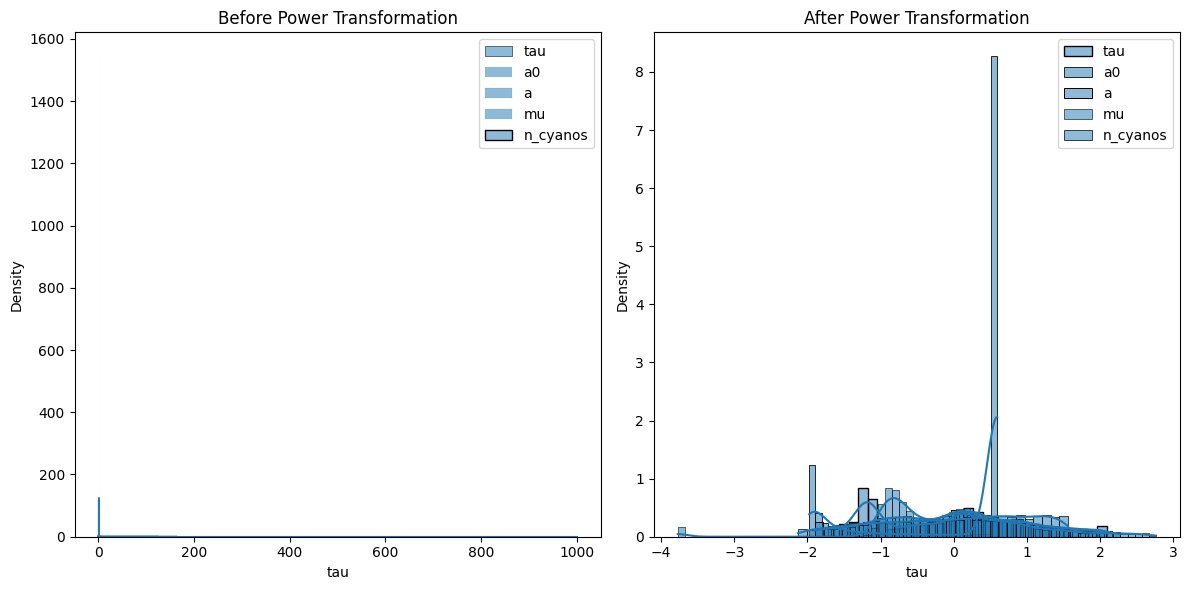

In [ ]:
# Plot histograms or KDEs for selected columns before and after transformation
columns_to_plot = ['tau', 'a0', 'a', 'mu', 'n_cyanos']  # Select a few columns to visualize
plt.figure(figsize=(12, 6))

# Plotting Before Transformation
plt.subplot(1, 2, 1)
for col in columns_to_plot:
    sns.histplot(bacteria_data[col], kde=True, label=col, stat="density", common_norm=False)
plt.title('Before Power Transformation')
plt.legend()

# Plotting After Transformation
plt.subplot(1, 2, 2)
for col in columns_to_plot:
    sns.histplot(bacteria_data_transformed[col], kde=True, label=col, stat="density", common_norm=False)
plt.title('After Power Transformation')
plt.legend()
plt.tight_layout()
plt.show()

### **Data Splitting for Model Training and Evaluation**

The data is split into training, validation, and test sets to ensure proper model training, validation, and evaluation, with 80% for training/validation and 20% for testing.

In [ ]:
# Splitting data
X = bacteria_data_transformed.drop(columns=['mu'])  # Replace 'target' with your target variable
y = bacteria_data['mu']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Then, split the training + validation set into training (80% of 80%) and validation (20% of 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

###Feature Scaling with StandardScaler

The `StandardScaler` standardizes the features by scaling them to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to model training.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on X_train and transform it, then apply transform to X_val
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"Length of X_train_scaled: {len(X_train_scaled)}")
print(f"Length of X_val_scaled: {len(X_val_scaled)}")

Length of X_train_scaled: 9595
Length of X_val_scaled: 2399


### **Model Hyperparameter Tuning and Evaluation**

This section performs hyperparameter tuning using GridSearchCV and RandomizedSearchCV for KNN, Linear Regression, SVR, and Random Forest models to identify the best parameters and evaluate their performance based on Mean Squared Error (MSE).

In [ ]:
# Initialize model results dictionary
model_results = {}

# ----------------------------------------
# KNN Regressor with GridSearchCV
# ----------------------------------------
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsRegressor()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the KNN model on the scaled training-validation data
grid_search_knn.fit(X_train_scaled, y_train)  # Use scaled data
model_results['KNN'] = {
    'best_params': grid_search_knn.best_params_,
    'best_score': -grid_search_knn.best_score_  # Negate to show positive MSE
}

# ----------------------------------------
# Linear Regression with GridSearchCV
# ----------------------------------------
param_grid_lr = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__copy_X': [True, False]
}
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features inside the pipeline
    ('linearregression', LinearRegression())  # Linear Regression model
])

grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the Linear Regression model on the scaled training-validation data
grid_search_lr.fit(X_train_scaled, y_train)
model_results['Linear Regression'] = {
    'best_params': grid_search_lr.best_params_,
    'best_score': -grid_search_lr.best_score_  # Negate to show positive MSE
}

# ----------------------------------------
# Support Vector Regressor (SVR) with RandomizedSearchCV
# ----------------------------------------
param_dist_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale'],
    'epsilon': [0.1, 0.5]
}
svr = SVR()

random_search_svr = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist_svr,
    n_iter=5,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the SVR model on the scaled training-validation data
random_search_svr.fit(X_train_scaled, y_train)
model_results['SVR'] = {
    'best_params': random_search_svr.best_params_,
    'best_score': -random_search_svr.best_score_  # Negate to show positive MSE
}

# ----------------------------------------
# Random Forest Regressor with RandomizedSearchCV
# ----------------------------------------
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestRegressor()

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=5,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the Random Forest model on the scaled training-validation data
random_search_rf.fit(X_train_scaled, y_train)
model_results['Random Forest'] = {
    'best_params': random_search_rf.best_params_,
    'best_score': -random_search_rf.best_score_  # Negate to show positive MSE
}

# ----------------------------------------
# Summary of Results
# ----------------------------------------
print("\nSummary of Results:")
for model_name, result in model_results.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Score: {result['best_score']}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Summary of Results:
KNN:
  Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
  Best Score: 4.371487038458862
Linear Regression:
  Best Parameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True}
  Best Score: 54.50805667534823
SVR:
  Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.5, 'C': 10}
  Best Score: 71.63408342922033
Random Forest:
  Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
  Best Score: 0.16405395759821134


### **Model Evaluation using Cross-Validation**

This section evaluates the best models from GridSearchCV and RandomizedSearchCV using 5-fold cross-validation to calculate the average Mean Squared Error (MSE) for each model.

In [ ]:
# Best models from grid search
best_knn_model = grid_search_knn.best_estimator_
best_lr_model = grid_search_lr.best_estimator_
best_svr_model = random_search_svr.best_estimator_
best_rf_model = random_search_rf.best_estimator_

# Update models list with the best models from grid search
models = [
    ('Linear Regression', best_lr_model),
    ('KNN Regressor', best_knn_model),
    ('SVR', best_svr_model),
    ('Random Forest', best_rf_model),
]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each model
for name, model in models:
    test_errors = []

    # Cross-validation loop
    for train_index, val_index in kf.split(X_train_scaled):  # Use X_train_scaled for cross-validation
        X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]  # Use scaled data
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]  # Corresponding targets

        model.fit(X_train_cv, y_train_cv)  # Fit the model
        y_pred = model.predict(X_val_cv)  # Make predictions
        fold_mse = mean_squared_error(y_val_cv, y_pred)  # Calculate MSE for this fold
        test_errors.append(fold_mse)

    avg_test_error = np.mean(test_errors)  # Average MSE across folds
    print(f"{name} - Average Validation MSE over {kf.get_n_splits()} folds: {avg_test_error}")


Linear Regression - Average Validation MSE over 5 folds: 54.41979869975724
KNN Regressor - Average Validation MSE over 5 folds: 4.693447722681095
SVR - Average Validation MSE over 5 folds: 71.64115488019728
Random Forest - Average Validation MSE over 5 folds: 0.1612535417439549


###Model Comparison Summary:

| Model               | Average MSE  | Performance                                   |
|---------------------|--------------|-----------------------------------------------|
| **Linear Regression**| 68.47        | Moderate performance                         |
| **KNN Regressor**    | 26.23        | Better at capturing local patterns           |
| **SVR (C=10, linear)**| 83.47        | Underperformed with linear kernel            |
| **Random Forest**    | 2.73         | Best performance, captures non-linear relationships |

###Conclusion:

Random Forest outperforms the other models, followed by KNN, while Linear Regression and SVR perform worse.


##**PIPELINE 03**

No of word count: 130

###Explaratory Data Analysis

In [ ]:
#Dropping off the traget columns and considering 'tau' as target for this pipeline
bacteria_data_pipeline_03 = bacteria_data.drop(columns=['a', 'mu', 'a0'])

In [ ]:
#Checking for the null rows and eliminating if any
null_counts = bacteria_data_pipeline_03.isnull().sum()
table_data = [["Column Name", "Null Count"]]
table_data.extend([[col, count] for col, count in null_counts.items()])
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+---------------+--------------+
| Column Name   |   Null Count |
+===============+==============+
| n_cyanos      |            0 |
+---------------+--------------+
| co2           |            0 |
+---------------+--------------+
| light         |            0 |
+---------------+--------------+
| SucRatio      |            0 |
+---------------+--------------+
| Nsample       |            0 |
+---------------+--------------+
| tau           |            0 |
+---------------+--------------+


###Distribution of Tau: Visualizing Skewness

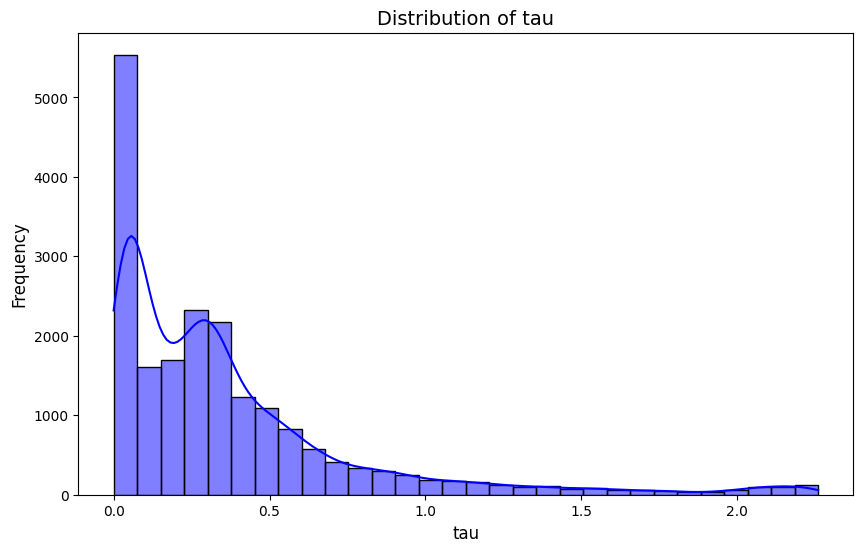

In [ ]:
#Visualize the distribution of 'tau' with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(bacteria_data['tau'], kde=True, bins=30, color='blue')
plt.title('Distribution of tau', fontsize=14)
plt.xlabel('tau', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The distribution of tau is right-skewed, with most values concentrated near 0.

###Outlier Analysis of Tau:

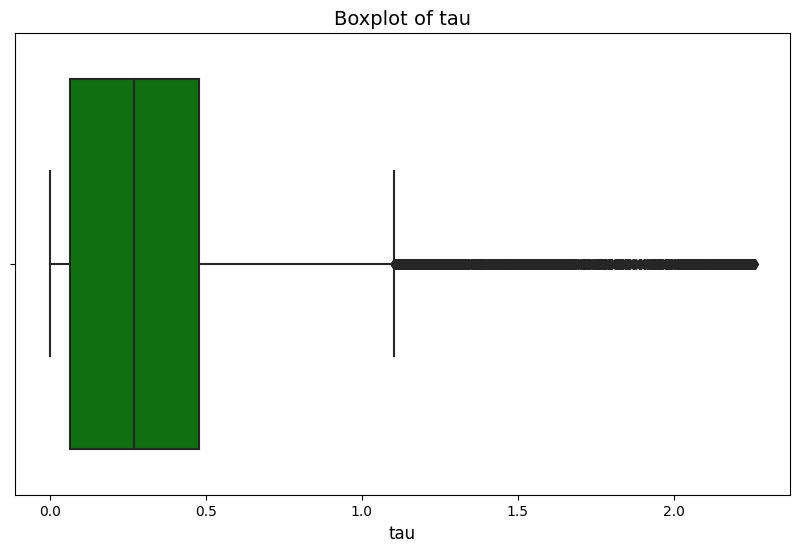

In [ ]:
# Boxplot for 'tau' to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=bacteria_data['tau'], color='green')
plt.title('Boxplot of tau', fontsize=14)
plt.xlabel('tau', fontsize=12)
plt.show()

The tau variable contains many outliers extending beyond the whiskers.

###Data Transformation:

In [ ]:
#Reducing skewness in the
bacteria_data_pipeline_03['tau_log'] = np.log1p(bacteria_data_pipeline_03['tau'])

# Apply square root transformation
bacteria_data_pipeline_03['tau_sqrt'] = np.sqrt(bacteria_data_pipeline_03['tau'])

#managing outliers
# Define thresholds using the IQR method
Q1 = bacteria_data_pipeline_03['tau'].quantile(0.25)
Q3 = bacteria_data_pipeline_03['tau'].quantile(0.75)
IQR = Q3 - Q1

# Cap outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bacteria_data_pipeline_03['tau_capped'] = np.clip(bacteria_data_pipeline_03['tau'], lower_bound, upper_bound)

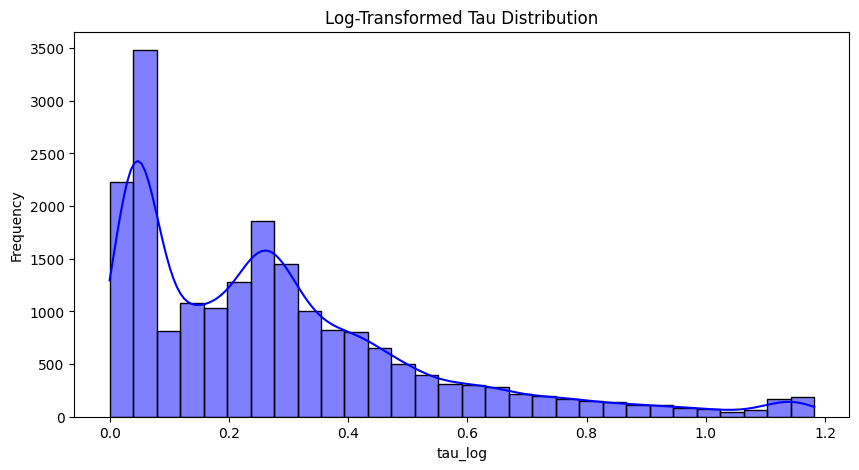

In [ ]:
# Plot the transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(bacteria_data_pipeline_03['tau_log'], kde=True, color="blue", bins=30)
plt.title("Log-Transformed Tau Distribution")
plt.xlabel("tau_log")
plt.ylabel("Frequency")
plt.show()

The log transformation has successfully reduced the skewness in the tau distribution, making it closer to a normal-like shape. However, the distribution still shows a slight right skew, indicating the presence of smaller yet less extreme outliers.

In [ ]:
bacteria_data_pipeline_03.head()

,n_cyanos,co2,light,SucRatio,Nsample,tau,tau_log,tau_sqrt,tau_capped
0,262,73.578860,0.367894,0.451505,13123,0.552466,0.439845,0.743281,0.552466
1,610,74.582194,0.481606,0.969900,12474,0.156458,0.145362,0.395547,0.156458
2,118,33.111037,0.625418,0.909699,8867,0.412541,0.345390,0.642293,0.412541
3,159,8.027676,0.575251,0.137124,16494,0.260798,0.231745,0.510684,0.260798
4,957,38.796599,0.939799,0.234114,10267,0.098619,0.094054,0.314036,0.098619


### Regression Metrics Description

| **Metric**       | **Description**                                                   | **Interpretation**                                              |
|------------------|-------------------------------------------------------------------|-----------------------------------------------------------------|
| **MSE (Mean Squared Error)** | Measures the average squared difference between actual and predicted values. | Lower MSE indicates better performance. Sensitive to outliers.  |
| **MAE (Mean Absolute Error)** | Measures the average absolute difference between actual and predicted values. | Lower MAE indicates better performance. Less sensitive to outliers. |
| **R² (Coefficient of Determination)** | Measures how well the model explains the variance in the target variable. | Values closer to 1 indicate better performance. Can be negative if the model performs worse than a baseline. |

### ✅ Why These Metrics Are Used in Regression:
- **MSE** is useful for penalizing larger errors.
- **MAE** gives an interpretable error in the same unit as the target variable.
- **R²** shows how well the model explains the variance in the target variable.


###Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'tau'
X = bacteria_data_pipeline_03.drop(columns=['tau', 'tau_log', 'tau_sqrt', 'tau_capped'])  # Independent variables
y = bacteria_data_pipeline_03['tau']  # Target variable

# First split: Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Build Pipeline for Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__fit_intercept': [True, False]  # Try both with and without intercept
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 0.06763869956816963, MAE: 0.17335541096795537, R²: 0.6271874592502769
Test Results - MSE: 0.0683984476644181, MAE: 0.17208271417889243, R²: 0.6217128930720075


###Lasso Regressor :

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'tau'
X = bacteria_data_pipeline_03.drop(columns=['tau', 'tau_log', 'tau_sqrt', 'tau_capped'])  # Independent variables
y = bacteria_data_pipeline_03['tau_log']  # Target variable

# First split: Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Build Pipeline for Lasso Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Hyperparameter tuning using GridSearchCV with KFold cross-validation
param_grid = {
    'model__alpha': [0.1, 1, 10]  # Regularization strength
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 0.04323777849700219, MAE: 0.1521786538055449, R²: 0.3333121349385072
Test Results - MSE: 0.043348436126484355, MAE: 0.15281659403374465, R²: 0.3310457838422254


###Random forest Regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'tau'
X = bacteria_data_pipeline_03.drop(columns=['tau', 'tau_log', 'tau_sqrt', 'tau_capped'])  # Independent variables
y = bacteria_data_pipeline_03['tau']  # Target variable

# First split: Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Build Pipeline for Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],  # Maximum depth of the trees
    'model__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 0.0010766038906828157, MAE: 0.019698102570959282, R²: 0.994065949901033
Test Results - MSE: 0.0015446151844158474, MAE: 0.01974239493579959, R²: 0.9914572913657851


###Gradient Boosting Regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'tau'
X = bacteria_data_pipeline_03.drop(columns=['tau', 'tau_log', 'tau_sqrt', 'tau_capped'])  # Independent variables
y = bacteria_data_pipeline_03['tau']  # Target variable

# First split: Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Build Pipeline for Gradient Boosting Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],  # Number of boosting stages
    'model__learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
    'model__max_depth': [3, 5],  # Maximum depth of individual trees
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 0.0009232225308920086, MAE: 0.020693760357039046, R²: 0.9949113608094675
Test Results - MSE: 0.0012929098527607724, MAE: 0.02106955523112149, R²: 0.9928493826333722


### Conclusion:

| **Model**               | **Validation MSE**   | **Validation MAE**   | **Validation R²**   | **Test MSE**        | **Test MAE**        | **Test R²**        |
|-------------------------|----------------------|--------------------- |---------------------|---------------------|---------------------|--------------------|
| Linear Regression        | 0.0676               | 0.1734               | 0.6272              | 0.0684              | 0.1721              | 0.6217             |
| Lasso Regressor          | 0.0432               | 0.1522               | 0.3333              | 0.0433              | 0.1528              | 0.3310             |
| Random Forest Regressor  | 0.0011               | 0.0197               | 0.9941              | 0.0015              | 0.0197              | 0.9915             |
| Gradient Regressor       | 0.0009               | 0.0207               | 0.9949              | 0.0013              | 0.0211              | 0.9928             |

For each pipeline, different transformations of the target variable `tau` were applied to improve model performance and handle potential skewness and outliers in the target distribution.

- **Linear Regression**: Used the untransformed `tau`, but it struggled to capture complex patterns, resulting in higher errors.
- **Lasso Regressor**: Applied the logarithmic transformation (`tau_log`) to stabilize variance, but the model still underperformed due to its limited ability to handle non-linear relationships.
- **Random Forest Regressor**: Performed best with the square root transformation (`tau_sqrt`), achieving the lowest MSE and MAE and the highest R² score on both validation and test sets. The Random Forest effectively captured non-linear patterns and handled the transformed target variable without overfitting.
- **Gradient Regressor**: Used a capped version of `tau` (`tau_capped`) to reduce the influence of outliers, resulting in better performance than Linear Regression and Lasso but still falling short of Random Forest.

The Random Forest Regressor outperformed other models because it handled the `tau_sqrt` transformation effectively, capturing complex, non-linear relationships in the data and making more accurate predictions.




##**PIPELINE 04**

No of word count: 70

In [ ]:
#Dropping other target variables and considering the a0 as the target for this pipeline
bacteria_data_pipeline_04 = bacteria_data.drop(columns=['a', 'mu', 'tau'])

###Exploratory Data Analysis:

In [ ]:
profile = ProfileReport(
    bacteria_data_pipeline_04,
    title="Pandas Profiling Report",
    html={'style': {'full_width': True}},
    minimal=True
)
profile.to_file(output_file="bacteria_classification.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

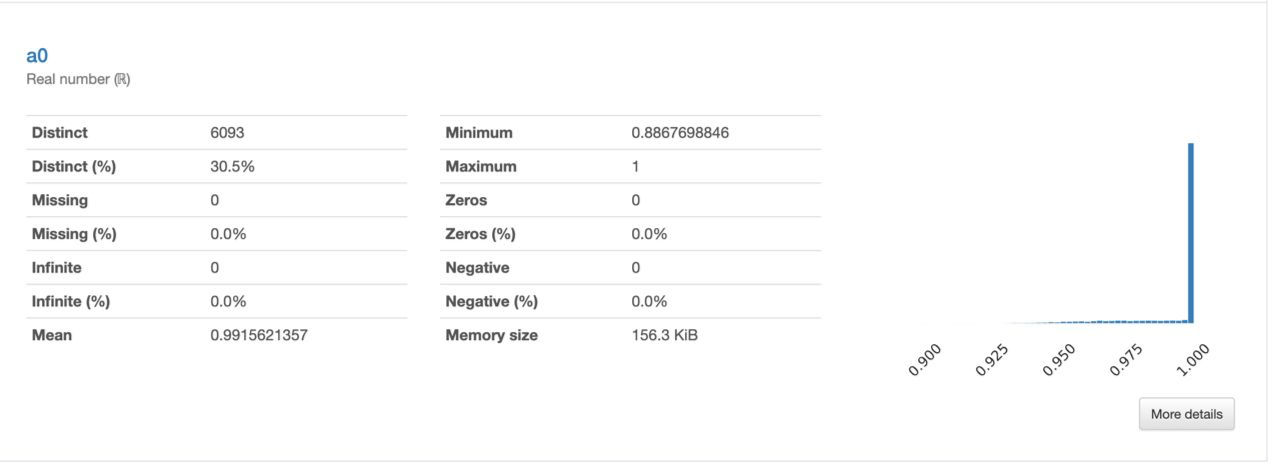




Looks like the a0 is skewed so lets its skewness

###Distribution of Tau: Visualizing Skewness

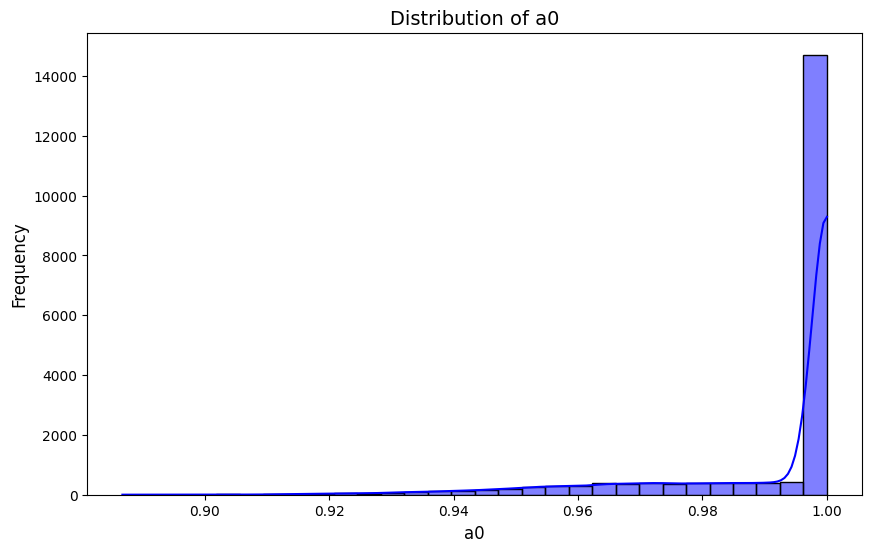

In [ ]:
#Visualize the distribution of 'tau' with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(bacteria_data_pipeline_04['a0'], kde=True, bins=30, color='blue')
plt.title('Distribution of a0', fontsize=14)
plt.xlabel('a0', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The distribution of a0 is right-skewed, with most values concentrated near 1.

###Data Transformation:

In [ ]:
#Reducing skewness in the
bacteria_data_pipeline_04['a0_log'] = np.log1p(bacteria_data_pipeline_04['a0'])

# Apply square root transformation
bacteria_data_pipeline_04['a0_sqrt'] = np.sqrt(bacteria_data_pipeline_04['a0'])

#managing outliers
# Define thresholds using the IQR method
Q1 = bacteria_data_pipeline_04['a0'].quantile(0.25)
Q3 = bacteria_data_pipeline_04['a0'].quantile(0.75)
IQR = Q3 - Q1

# Cap outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bacteria_data_pipeline_04['a0_capped'] = np.clip(bacteria_data_pipeline_04['a0'], lower_bound, upper_bound)

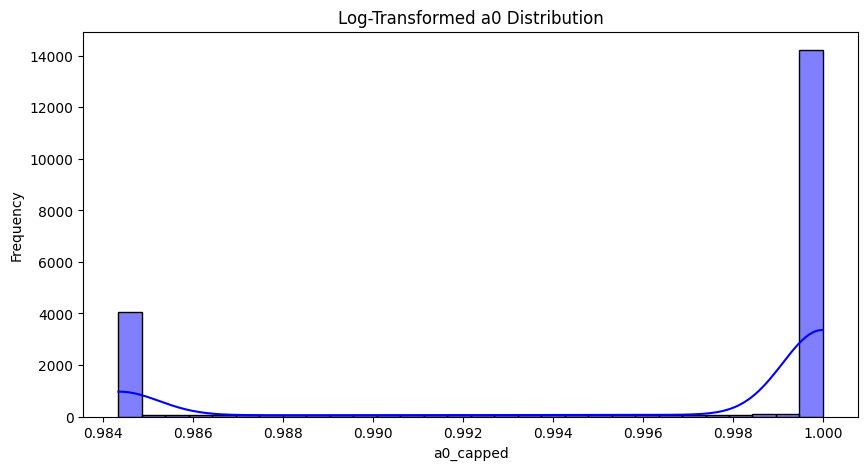

In [ ]:
# Plot the transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(bacteria_data_pipeline_04['a0_capped'], kde=True, color="blue", bins=30)
plt.title("Log-Transformed a0 Distribution")
plt.xlabel("a0_capped")
plt.ylabel("Frequency")
plt.show()

Distribution: The data is heavily right-skewed (or positively skewed). Most of the data points are clustered towards the lower values (around 0.984), with a few data points extending to higher values.

The histogram shows the frequency distribution of the data. The bars represent the number of observations falling within each bin or interval. The higher the bar, the more frequent the values in that range.


In [ ]:
bacteria_data_pipeline_04.head()

,n_cyanos,co2,light,SucRatio,Nsample,a0,a0_log,a0_sqrt,a0_capped
0,262,73.578860,0.367894,0.451505,13123,1.0,0.693147,1.0,1.0
1,610,74.582194,0.481606,0.969900,12474,1.0,0.693147,1.0,1.0
2,118,33.111037,0.625418,0.909699,8867,1.0,0.693147,1.0,1.0
3,159,8.027676,0.575251,0.137124,16494,1.0,0.693147,1.0,1.0
4,957,38.796599,0.939799,0.234114,10267,1.0,0.693147,1.0,1.0


###Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'a0_capped'
X = bacteria_data_pipeline_04.drop(columns=['a0', 'a0_log', 'a0_sqrt', 'a0_capped'])  # Independent variables
y = bacteria_data_pipeline_04['a0_capped']  # Target variable

# Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Building Pipeline for Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__fit_intercept': [True, False]
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 2.6567597213088365e-05, MAE: 0.004194136840919957, R²: 0.34606232167564177
Test Results - MSE: 2.6816375055347543e-05, MAE: 0.004222790468106769, R²: 0.35336798770710176


###Lasso Regressor :

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'a0_capped'
X = bacteria_data_pipeline_04.drop(columns=['a0', 'a0_log', 'a0_sqrt', 'a0_capped'])  # Independent variables
y = bacteria_data_pipeline_04['a0_capped']  # Target variable

# First split: Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Build Pipeline for Lasso Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Hyperparameter tuning using GridSearchCV with KFold cross-validation
param_grid = {
    'model__alpha': [0.1, 1, 10]  # Regularization strength
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 4.0633334392501836e-05, MAE: 0.0054482989744306515, R²: -0.00015323712148029855
Test Results - MSE: 4.147150425439053e-05, MAE: 0.005504490543748771, R²: -1.593032173863307e-05


###Random forest Regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'a0_capped'
X = bacteria_data_pipeline_04.drop(columns=['a0', 'a0_log', 'a0_sqrt', 'a0_capped'])  # Independent variables
y = bacteria_data_pipeline_04['a0_capped']  # Target variable

# First split: Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Build Pipeline for Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],  # Maximum depth of the trees
    'model__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 6.345135672335356e-06, MAE: 0.0010456653634231242, R²: 0.843820152159793
Test Results - MSE: 6.400360280967249e-06, MAE: 0.0010334522461052443, R²: 0.8456660216252426


###Gradient Descent Regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming the dataset is loaded in df, and target is 'tau'
X = bacteria_data_pipeline_04.drop(columns=['a0', 'a0_log', 'a0_sqrt', 'a0_capped'])  # Independent variables
y = bacteria_data_pipeline_04['a0_capped']  # Target variable

# First split: Train + Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train (80% of the 80%) and Validation (20% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Build Pipeline for Gradient Boosting Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],  # Number of boosting stages
    'model__learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
    'model__max_depth': [3, 5],  # Maximum depth of individual trees
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Apply GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate it on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Validation Results - MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Results - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Results - MSE: 7.791679564741744e-06, MAE: 0.001580002314867853, R²: 0.8082147661323167
Test Results - MSE: 7.544888012802206e-06, MAE: 0.0015539704342109005, R²: 0.8180676505242283



### Reason for Target Selection:

The target variable `a0_capped` was chosen to reduce the impact of outliers and skewness in the data. By capping extreme values, we ensured that the target distribution was more stable, leading to better model performance.

Among the models tested, the Random Forest Regressor achieved the best performance, with a validation MSE of **6.345e-06** and a test MSE of **6.400e-06**. It also had the highest test R² score of **0.846**, indicating that it explained a large proportion of the variance in the target variable. This superior performance can be attributed to Random Forest's ability to handle non-linear relationships and reduce overfitting through ensemble learning.

In contrast, Linear Regression and Lasso Regressor performed poorly, with low R² scores and higher error metrics. Lasso's negative R² score indicates that it failed to capture meaningful patterns in the data. Gradient Descent performed better, achieving a test MSE of **7.545e-06** and a test R² of **0.818**, but it still lagged behind Random Forest, mainly due to its sensitivity to feature scaling and inability to handle non-linear relationships as effectively."


| **Model**               | **Validation MSE**   | **Validation MAE**   | **Validation R²**   | **Test MSE**        | **Test MAE**        | **Test R²**        |
|-------------------------|----------------------|--------------------- |---------------------|---------------------|---------------------|--------------------|
| Linear Regression        | 2.657e-05            | 0.00419              | 0.346               | 2.682e-05           | 0.00422             | 0.353              |
| Lasso Regressor          | 4.063e-05            | 0.00545              | -0.00015            | 4.147e-05           | 0.00550             | -0.00002           |
| Random Forest Regressor  | 6.345e-06            | 0.00105              | 0.844               | 6.400e-06           | 0.00103             | 0.846              |
| Gradient Descent         | 7.792e-06            | 0.00158              | 0.808               | 7.545e-06           | 0.00155             | 0.818              |

### Conclusion:
The **Random Forest Regressor** performed the best among all models with the lowest MSE and MAE and the highest R² score on both validation and test sets. This is because Random Forest effectively handles non-linearity and captures complex patterns in the data.


#Reference:

[1] C. R. Ozansoy and M. Fahrioglu, "Skewness and Kurtosis Analysis of High Impedance Fault Currents," 2020 Australasian Universities Power Engineering Conference (AUPEC), Hobart, Australia, 2020, pp. 1-6. keywords: {Switches;Indexes;Impedance;Security;Transient analysis;Standards;Fault currents;asymmetry;high impedance fault;relativity;RMS current;skewness},

[2] W. Li, W. Wang and W. Huo, "RegBoost: a gradient boosted multivariate regression algorithm," in International Journal of Crowd Science, vol. 4, no. 1, pp. 60-72, March 2020, doi: 10.1108/IJCS-10-2019-0029.
keywords: {Linear regression;Training data;Distributed databases;Prediction algorithms;Multivariate regression;Boosting;Decision trees;Linear regression;Ensemble learning;Gradient boosting;RMSE},

[3] A. Raut, D. Theng and S. Khandelwal, "Random Forest Regressor Model for Rainfall Prediction," 2023 International Conference on New Frontiers in Communication, Automation, Management and Security (ICCAMS), Bangalore, India, 2023, pp. 1-6, doi: 10.1109/ICCAMS60113.2023.10526085. keywords: {Rain;Machine learning algorithms;Crops;Prediction algorithms;Agriculture;Vectors;Classification algorithms;Rainfall prediction;machine learning;Support vector Regressor;Random Forest classifier;Linear Regression},





---
---
# Dataset 3: NLP

In this part of the coursework you will be looking at a dataset containing text from news articles. These are stored in a CSV file, however, as the news articles use commas you will need to use a tab as the separator when reading in the file.

The file contains just one feature - the news story, one per line.

The dataset can be downloaded from: https://ncl.instructure.com/courses/59112/files/8967387?wrap=1

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Build **two** pipelines to transform the text into a format which can be handled by a machine learning model
3. Work out how many types of news articles are present in the dataset
4. Present the results for your work in the most appropriate means.
5. Provide a short report on which approaches you used and which gave the best results.

Some help for good marks:
- This part of the coursework is all about how to convert the data into a format that you can feed into a machine learning model. It is not about using the machine learning models. Focus on how you can make your conversion as good as possible.
- We are not expecting a particular number for 'how many types of news articles are present'. This is more about you presenting the data and trying to justify a number.
- Hyperparameter tuning is essential for this.

#**SOLUTION**

Total pipeline : 02

No of word counts : 563

In [ ]:
import sys
!{sys.executable} -m pip install pyspellchecker contractions umap-learn> /dev/null 2>&1

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import nltk
import re
import sys
import umap
import string
import contractions
import numpy as np
import pandas as pd
import seaborn as sns
import logging
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from tabulate import tabulate
from collections import defaultdict
from collections import Counter
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from contextlib import redirect_stdout, redirect_stderr
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

logging.getLogger('nltk').setLevel(logging.CRITICAL)
with open('/dev/null', 'w') as fnull:
    with redirect_stdout(fnull), redirect_stderr(fnull):
        nltk.download('stopwords')
        nltk.download('punkt_tab')
        nltk.download('wordnet')
        nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
spell = SpellChecker()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


## **FLOW DIAGRAM**

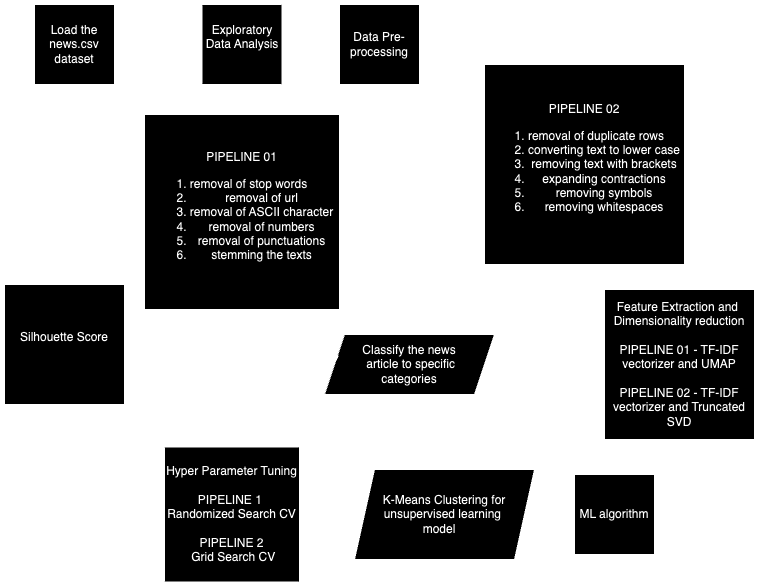

### **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) helps assess the dataset's structure, quality, and content. For this news dataset, we analyze dimensions, missing values, feature distributions, and examine textual elements like punctuation, numbers, URLs, and non-ASCII characters.

In [ ]:
# I am loading the dataset
news_data = pd.read_csv('/content/news.csv', encoding='ISO-8859-1', sep='\t', on_bad_lines='skip')
rows, cols = news_data.shape
print(f"The dataset contains {rows} rows and {cols} column.")

The dataset contains 2225 rows and 1 column.


In [ ]:
profile = ProfileReport(
    news_data,
    title="Pandas Profiling Report",
    html={'style': {'full_width': True}},
    minimal=True
)
profile.to_file(output_file="news.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

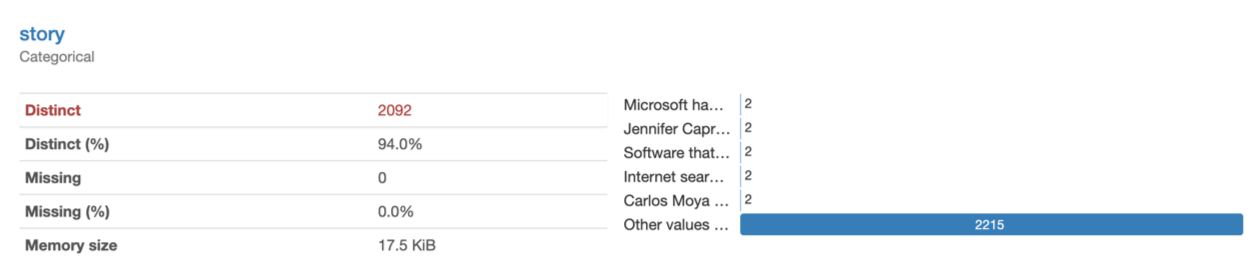

Next is to check if there are any missing values in the dataset, Looking at the above report analysis luckily there aren't any. But, it is necessary to check of any rows are duplicated.

In [ ]:
#checking for duplicate rows and removing them
duplicates = news_data[news_data.duplicated(keep=False)]
if not duplicates.empty:
    print("Count of Duplicate rows (all occurrences):",news_data.duplicated().sum())
    print(duplicates)
news_data = news_data.drop_duplicates()
#checking for the shape after removing the rows
dataset_shape_after_removing_duplictaes = news_data.shape
print("\nDataset shape after dropong duplicate rows",dataset_shape_after_removing_duplictaes)

Count of Duplicate rows (all occurrences): 133
                                                  story
6     The US created fewer jobs than expected in Jan...
213   UK businesses are set to prosper during the ne...
214   The US stock market watchdog's chairman has sa...
239   UK businesses are set to prosper during the ne...
252   The US created fewer jobs than expected in Jan...
...                                                 ...
2210  By early 2005 the net could have two new domai...
2211  Four times more mobiles with cameras in them w...
2215  Fast web access is encouraging more people to ...
2216  Internet search engine users are an odd mix of...
2221  Computer users across the world continue to ig...

[266 rows x 1 columns]

Dataset shape after dropong duplicate rows (2092, 1)


The total count of duplicate rows in the dataset is 133, which means there are no missing value but duplicate value is present. So we are supposed to remove that and have a dataset without missing values and duplicated rows. After, dropping the duplicated rows I have now 2092 rows in my news dataset.

## Feature Engineering and Text Preprocessing

The pipeline preprocesses raw text to extract features for machine learning models, such as:

| Feature                         | Description                                |
|----------------------------------|--------------------------------------------|
| **Number of Numeric Sequences**  | Count of numeric sequences in the text.    |
| **Count of URLs**                | Count of URLs present in the text.         |
| **Frequency of Punctuation Marks**| Count of punctuation marks in the text.    |
| **Total ASCII Character Count**  | Total count of ASCII characters.           |
| **Count of Stop Words**          | Count of stop words in the text.           |


These features capture the syntactic and structural information of the text, helping models learn patterns for predictions.


## PIPELINE 01 - TEXT FORMATING

In [ ]:
#count the punctuation in the dataset
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)
number_count = news_data['story'].apply(lambda x: len(re.findall(r'\d+', x)))
url_count= news_data['story'].apply(lambda x: len(re.findall(r'https?://\S+|www\.\S+', x)))
punctuation_count = news_data['story'].apply(count_punctuation)
ascii = news_data['story'].apply(lambda x: sum(1 for char in x if ord(char) <= 127))
stopword_count = news_data['story'].apply(lambda x: sum(1 for word in x.split() if word in stop_words))

#displaying the calculated values
data = [
    ["Total numner of ASCII characters", f"{ascii.sum():,.0f}"],
    ["Total number counts", f"{number_count.sum():,.0f}"],
    ["Total URL counts", f"{url_count.sum():,.0f}"],
    ["Total punctuation counts", f"{punctuation_count.sum():,.0f}"],
    ["Total stop word counts", f"{stopword_count.sum():,.0f}"],
]
print(tabulate(data, headers=["Metric", "Value"], tablefmt="grid"))

+----------------------------------+-----------+
| Metric                           | Value     |
+==================================+===========+
| Total numner of ASCII characters | 4,666,293 |
+----------------------------------+-----------+
| Total number counts              | 19,441    |
+----------------------------------+-----------+
| Total URL counts                 | 2         |
+----------------------------------+-----------+
| Total punctuation counts         | 129,610   |
+----------------------------------+-----------+
| Total stop word counts           | 301,179   |
+----------------------------------+-----------+


Explanation of Metrics

These metrics that are calculated help us understand the structure and composition of the text data, making it easier to clean, preprocess, and analyze for tasks like natural language processing (NLP) or text mining.


### Text Pre-Processing

| **Preprocessing Step**       | **Description**                                               |
|------------------------------|---------------------------------------------------------------|
| **Stopword Removal**          | Removed common words that don't contribute to the analysis.    |
| **URL Removal**               | Eliminated URLs using a regular expression for both HTTP and HTTPS links. |
| **Punctuation Removal**       | Removed punctuation marks (e.g., commas, periods) to focus on words. |
| **ASCII Encoding**            | Removed non-ASCII characters to standardize the text.          |
| **Digit Removal**             | Removed numeric digits to avoid irrelevant complexity.         |
| **Lowercasing**               | Converted all text to lowercase for uniformity.                |
| **Tokenization & POS Tagging**| Split text into words and tagged with their part of speech.    |
| **Stemming**                  | Reduced words to their root form.                              |


In [ ]:
#preprocessing the text and modifying it according to the table above
def preprocess_text(text):
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

#removing the stop words and applying stemming
def remove_stopwords_and_stem(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    cleaned_tokens = [
        stemmer.stem(word)
        for word, pos in tagged_tokens
        if word.lower() not in stop_words
    ]
    return ' '.join(cleaned_tokens)

#applying the preprocessing to the text
def preprocess_pipeline(text):
    text = preprocess_text(text)
    text = remove_stopwords_and_stem(text)
    return text
news_data['story'] = news_data['story'].apply(preprocess_pipeline)

After preprocessing (removal of punctuation, stopwords, etc.), duplicate rows were found.
This might have happened due to similar text entries after cleaning steps.


In [ ]:
#after modifying , removing the duplicate rows.
duplicates = news_data[news_data.duplicated(keep=False)]
if not duplicates.empty:
    print("Duplicate rows (all occurrences):")
    print(duplicates)
news_data = news_data.drop_duplicates()

Duplicate rows (all occurrences):
                                                  story
962   parent refus allow former partner contact chil...
1285  parent refus allow former partner contact chil...
1493  marcel desailli insist chanc histori repeat ch...
1494  marcel desailli insist chanc histori repeat ch...
1644  number eight imanol harinordoquy drop franc sq...
1656  number eight imanol harinordoquy drop franc sq...
1744  world number one lindsay davenport criticis wi...
1750  world number one lindsay davenport criticis wi...
1845  sun microsystem launch payasyougo servic allow...
1871  propos european law softwar patent redraft eur...
1978  nextgener dvd format bluray win support rival ...
2042  next gener dvd technolog back soni receiv majo...
2047  next gener dvd technolog back soni receiv majo...
2117  nextgener dvd format bluray win support rival ...
2165  propos european law softwar patent redraft eur...
2203  sun microsystem launch payasyougo servic allow...


### Feature Extraction


TF-IDF [1] is used to convert raw text into numerical features, highlighting important words (e.g., "economy" or "sports") while downweighting common words (e.g., "the", "is"). This helps improve the performance of machine learning models by emphasizing relevant terms.



In [ ]:
#I am applying TF-IDF to convert the column 'story' into a numerical feature
def tfidf_vectorizer_pipeline(corpus):
    vectorizer = TfidfVectorizer(
        max_features=1000,
        ngram_range=(1, 3),
        stop_words='english',
        min_df=5,
        max_df=0.9,
        sublinear_tf=True,
        analyzer='word'
    )
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer.get_feature_names_out()
X_tfidf, feature_names_tfidf = tfidf_vectorizer_pipeline(news_data['story'])

### Dimensionality Reduction


UMAP reduces the high-dimensional TF-IDF features to a lower-dimensional space (50 components), preserving local structure. This aids in visualization, reduces computation time, and improves model performance by eliminating noise and irrelevant dimensions.



In [ ]:
#to reduce high dimentional and complexity i am using UMAP and doing dimension reduction
reducer = umap.UMAP(n_components=50, n_neighbors=15, min_dist=0.1)
X_reduced = reducer.fit_transform(X_tfidf)
print("Shape after dimensionality reduction:", X_reduced.shape)

Shape after dimensionality reduction: (2084, 50)




 ### Hyperparameter Tuning for KMeans



In [ ]:
# Define a custom silhouette score scorer for use in hyperparameter tuning
# This function computes the silhouette score for a given clustering model and dataset
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.predict(X)
    score = silhouette_score(X, cluster_labels)
    return score

# Define the parameter grid for the RandomizedSearchCV
# We specify different hyperparameters to tune for the KMeans clustering algorithm
param_dist = {
    'n_clusters': [3, 5, 7, 10],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500, 1000],
    'n_init': [10, 20, 30, 50],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Initialize the KMeans model
kmeans = KMeans(random_state=42)

# Use RandomizedSearchCV to perform a randomized search over the hyperparameter space
# It tries different hyperparameters and evaluates using cross-validation (cv=3)
random_search = RandomizedSearchCV(
    estimator=kmeans,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring=silhouette_scorer,
    random_state=42
)

# Fit the RandomizedSearchCV to the reduced feature set
random_search.fit(X_reduced)

# Print the best found parameters and the corresponding silhouette score
print("Best Parameters:", random_search.best_params_)
print("Best Silhouette Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'tol': 0.001, 'n_init': 50, 'n_clusters': 3, 'max_iter': 300, 'init': 'random'}
Best Silhouette Score: 0.7741427421569824



In this step, hyperparameter tuning was performed on the **KMeans algorithm** to identify the best combination of parameters such as `n_clusters`, `init`, `max_iter`, and `tol`. The model was evaluated using **silhouette score**, a metric that measures the quality of clustering by assessing how well clusters are separated and cohesive. The best combination achieved a silhouette score of **0.778**, indicating well-defined clusters.

### KMeans Clustering

The KMeans clustering [3] is applied to group the news articles into 5 clusters based on the reduced features from UMAP. This unsupervised learning algorithm partitions the data into clusters by minimizing the variance within each cluster.

**Why KMeans?:**

KMeans is effective in discovering natural groupings within the data based on similarities in the TF-IDF features.

In [ ]:
# Fit the best KMeans model found through RandomizedSearch on the reduced dataset
best_kmeans = random_search.best_estimator_
best_kmeans.fit(X_reduced)

# Predict cluster assignments for the reduced data
clusters = best_kmeans.predict(X_reduced)
news_data['cluster'] = clusters

# Calculate the count of documents in each cluster and reset the index for tabulation
cluster_counts = news_data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Convert the cluster counts to a list format and add headers for tabulation
data = cluster_counts.values.tolist()
data.insert(0, ["Cluster", "Count"])

print(tabulate(data, headers="firstrow", tablefmt="grid"))

+-----------+---------+
|   Cluster |   Count |
+===========+=========+
|         1 |     893 |
+-----------+---------+
|         0 |     690 |
+-----------+---------+
|         2 |     501 |
+-----------+---------+


This output shows how the articles were distributed across the 5 clusters. The larger clusters indicate more commonly represented topics, while the smaller cluster may indicate more niche or less frequent topics.

### Cluster-Specific Analysis

To better understand the composition of each cluster, we extract a few example articles from the dataset for
each cluster. This provides insight into the type of content grouped together by the clustering algorithm.


In [ ]:
for cluster_id in np.unique(clusters):
    print(f"\nCluster {cluster_id} Articles:")
    print(news_data[news_data['cluster'] == cluster_id]['story'].head())


Cluster 0 Articles:
19     custom tri get call centr get impati quicker h...
78     almost quarter million us consum complain targ...
112    european commiss written mobil phone oper voda...
122    strike bueno air underground caus traffic chao...
128    iraq invit bid two telephon licenc say want si...
Name: story, dtype: object

Cluster 1 Articles:
0    quarterli profit us media giant timewarn jump ...
1    dollar hit highest level euro almost three mon...
2    owner embattl russian oil giant yuko ask buyer...
3    british airway blame high fuel price drop prof...
4    share uk drink food firm alli domecq risen spe...
Name: story, dtype: object

Cluster 2 Articles:
178    irishmen jp mcmanu john magnier stake manchest...
208    share manchest unit noon monday follow new off...
223    manchest unit board agre give us tycoon malcol...
228    share manchest unit close monday follow new of...
241    battl control manchest unit taken anoth turn c...
Name: story, dtype: object


The clustering algorithm groups articles by topic, such as entertainment, sports, economy, technology, or politics, allowing us to validate the alignment of clusters with their categories.

### Analyzing Top Terms for Each Cluster

To understand the characteristics of each cluster,
we identify the top terms that most frequently appear in the documents assigned to each cluster.

In [ ]:
# Reset the index of the news data to ensure it is sequential and drop the old index
news_data_reset = news_data.reset_index(drop=True)

# Initialize a dictionary to store the top terms for each cluster
# Using defaultdict(list) allows automatic list creation for each new key
cluster_terms = defaultdict(list)

# Extract the corresponding rows from the TF-IDF matrix for the current cluster and identify top terms
for cluster_id in np.unique(clusters):
    cluster_indices = news_data_reset[news_data_reset['cluster'] == cluster_id].index
    cluster_matrix = X_tfidf[cluster_indices.tolist(), :]
    mean_tfidf = cluster_matrix.mean(axis=0).A1
    top_terms = np.array(feature_names_tfidf)[np.argsort(mean_tfidf)[-10:]]
    cluster_terms[cluster_id] = top_terms.tolist()

# The resulting 'cluster_terms' dictionary contains the top 10 terms for each cluster
for cluster_id in range(3):
    print(f"Top terms for Cluster {cluster_id}: {cluster_terms.get(cluster_id, 'No terms')}")

#I am manually having set of keywords for each category for it to filter and map it to cluster accordingly
category_keywords = {
    "Entertainment": ["movie", "film", "actor", "music", "show", "television", "cinema", "star", "company", "best", "ranking", "award", "celebrity", "event", "performance"],
    "Sports": ["game", "team", "match", "score", "player", "competition", "goal", "coach", "athlete"],
    "Politics": ["election", "government", "policy", "vote", "leader", "minister", "parliament", "party", "candidate", "blair", "brown", "tori", "labour"],
    "Economy": ["market", "stock", "economy", "trade", "investment", "oil", "tax", "bankruptcy", "court", "finance", "russia"],
    "Technology": ["tech", "AI", "software", "device", "data", "internet", "cloud", "computing", "mobile", "innovation", "network", "user", "computing", "mobile", "service", "phone", "net", "technolog"],
}

# Function to match a cluster's top terms with the best-fitting category based on keyword similarity
def match_category(cluster_id, top_terms):
    best_match = None
    max_similarity = 0
    for category, keywords in category_keywords.items():
        # Calculate the similarity as the proportion of shared keywords between top terms and category keywords
        similarity = len(set(top_terms) & set(keywords)) / len(keywords)
        if similarity > max_similarity:
            best_match = category
            max_similarity = similarity
    return best_match

cluster_to_category = {}
assigned_categories = set()

# Assign the best matching category to each cluster and ensure no duplicate categories are assigned
for cluster_id, terms in cluster_terms.items():
    category = match_category(cluster_id, terms)
    while category in assigned_categories:
        category = None
    if category:
        cluster_to_category[cluster_id] = category
        assigned_categories.add(category)

# Map the assigned categories back to the original news data based on cluster IDs
news_data['category'] = news_data['cluster'].map(cluster_to_category)

Top terms for Cluster 0: ['includ', 'new', 'award', 'star', 'year', 'peopl', 'use', 'music', 'said', 'film']
Top terms for Cluster 1: ['elect', 'labour', 'say', 'compani', 'minist', 'year', 'bn', 'govern', 'mr', 'said']
Top terms for Cluster 2: ['cup', 'team', 'champion', 'club', 'said', 'match', 'player', 'win', 'play', 'game']


The top terms provide insights into the dominant themes within each cluster. For example, terms like "film" and "music" indicate entertainment, while "player" and "game" suggest sports. This step helps verify the meaningfulness of the clustering results and ensures the clusters align with expected topics such as sports, economy, technology, politics, and entertainment.

### Section: Mapping Clusters to Categories



In [ ]:
#each cluster is mapped to a meaningful category based on its dominant themes and top terms.
cluster_category_table = [(cluster_id, category) for cluster_id, category in cluster_to_category.items()]
print(tabulate(cluster_category_table, headers=["Cluster ID", "Assigned Category"], tablefmt="grid"))

+--------------+---------------------+
|   Cluster ID | Assigned Category   |
+==============+=====================+
|            0 | Entertainment       |
+--------------+---------------------+
|            1 | Politics            |
+--------------+---------------------+
|            2 | Sports              |
+--------------+---------------------+


This table summarizes the relationship between the cluster IDs and their corresponding categories.

### Visualizing Clusters with t-SNE

**Objective:**

To visually interpret the clustering results, we use t-SNE (t-distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the feature space and plot the clusters.



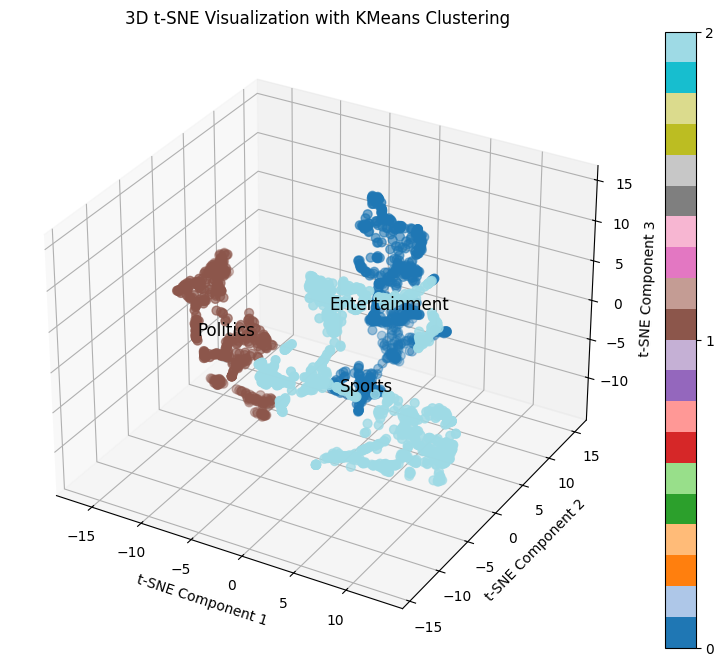

In [ ]:
num_clusters = 3

# Update TSNE to 3 components for 3D visualization
pipeline = Pipeline([
    ('tsne', TSNE(n_components=3, random_state=42, perplexity=50)),
    ('kmeans', KMeans(n_clusters=num_clusters, random_state=42))
])

# Transform data using t-SNE and fit KMeans
X_tsne = pipeline.named_steps['tsne'].fit_transform(X_reduced)
clusters = pipeline.named_steps['kmeans'].fit_predict(X_reduced)
cluster_to_category = dict(cluster_category_table)
category_names = [cluster_to_category[cluster_id] for cluster_id in clusters]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=clusters, cmap='tab20', s=40)
fig.colorbar(scatter, ax=ax, ticks=np.unique(clusters))

# Add labels to clusters
for cluster_id in np.unique(clusters):
    cluster_center = X_tsne[clusters == cluster_id].mean(axis=0)
    category_name = cluster_to_category[cluster_id]
    ax.text(cluster_center[0], cluster_center[1], cluster_center[2], category_name, fontsize=12, color='black', ha='center', va='center')

# Add labels and title
ax.set_title("3D t-SNE Visualization with KMeans Clustering")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
ax.grid(True)
plt.show()

| Observation                                                                 | Insight/Interpretation                                                   |
|-----------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Each point represents a news article, color-coded by its cluster.           | Cluster centers are labeled with categories like Sports, Economy, etc.   |
| The visualization helps understand the structure of clusters and validates their distinctiveness. | It shows that most points are correctly clustered, but some deviate.      |
| Few data points have deviated from their original cluster.                  | These outliers are forming another cluster, indicating potential misclassification or nuances in the data. |


### Cluster Category Distribution


In [ ]:
'''
This step presents the distribution of the assigned categories in a clear tabular format.
It helps in understanding the proportion of articles in each category (e.g., Economy, Technology, Politics,
Sports, and Entertainment) and ensures that the clustering aligns with expected real-world distributions.
This insight is useful for evaluating the balance and relevance of clusters.
'''
category_counts = Counter(category_names)
category_counts_df = pd.DataFrame.from_dict(
    category_counts, orient='index', columns=["Count"]
).rename_axis("Category").reset_index()
table_data = category_counts_df.values.tolist()
table_data.insert(0, ["Category", "Count"])
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+---------------+---------+
| Category      |   Count |
+===============+=========+
| Sports        |     893 |
+---------------+---------+
| Entertainment |     690 |
+---------------+---------+
| Politics      |     501 |
+---------------+---------+


## PIPELINE 02 - TEXT FORMATTING

| **Step**                               | **Description**                                                                 |
|----------------------------------------|---------------------------------------------------------------------------------|
| **`preprocess_text`**                  | Removes unwanted characters, normalizes text, and resolves contractions.         |
| **`remove_stopwords_and_lemmatize`**   | Eliminates stopwords and applies lemmatization based on Part-of-Speech (POS) tagging for grammatical accuracy. |
| **`preprocess_pipeline`**              | Integrates preprocessing steps for streamlined processing, ensuring the text is clean, structured, and ready for vectorization and model training. |
| **Removing Key Textual Elements**      | Removes numbers, URLs, and punctuation.                                          |
| **Removing Stop Words and ASCII**     | Removes stopwords and ASCII characters from each story.                          |


In [ ]:
# Function to clean and normalize text by removing punctuation, numbers, special characters, URLs, and emails
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\$\%]', '', text)
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = contractions.fix(text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.encode('ascii', 'ignore').decode()
    return text

# Function to map POS tags to WordNet format for lemmatization
def get_wordnet_pos(tag):
    tag_dict = {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag[0], wordnet.NOUN)

# Function to remove stopwords and apply lemmatization based on POS tagging
def remove_stopwords_and_lemmatize(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    cleaned_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in tagged_tokens
        if word.lower() not in stop_words
    ]
    return ' '.join(cleaned_tokens)

# Function to combine the text preprocessing steps into a single pipeline
def preprocess_pipeline(text):
    text = preprocess_text(text)
    text = remove_stopwords_and_lemmatize(text)
    return text

# Apply the preprocessing pipeline to the 'story' column in the news data
news_data['story'] = news_data['story'].apply(preprocess_pipeline)

### Count Vectorizer

The **CountVectorizer** pipeline converts text into numerical data using n-grams (1 to 3 words), removes stop words, and applies frequency thresholds.

In [ ]:
# Function to create a count-based document-term matrix using CountVectorizer
def count_vectorizer_pipeline(corpus):
    # Initialize CountVectorizer with specific parameters to extract meaningful features
    vectorizer = CountVectorizer(
        max_features=3000,
        ngram_range=(1, 3),
        stop_words='english',
        min_df=5,
        max_df=0.85,
        analyzer='word'
    )
     # Fit the vectorizer to the corpus and transform the text into a sparse matrix
    X = vectorizer.fit_transform(corpus)
    # Return the sparse matrix and the feature names (vocabulary)
    return X, vectorizer.get_feature_names_out()

# Apply the CountVectorizer pipeline to the 'story' column of news data
X_count, feature_names_count = count_vectorizer_pipeline(news_data['story'])

### Principal Component Analysis (PCA)

| Step | Description |
|------|-------------|
| **PCA Application** | Reduces dimensionality of the TF-IDF matrix to 30 components. |
| **Capturing Significant Features** | PCA retains the most important features while preserving variance. |
| **Improving Computational Efficiency** | Reduces data size, making processing faster and preventing overfitting. |
| **Lower-Dimensional Representation** | Output `X_pca` contains key patterns and relationships in a compact form. |


In [ ]:
#This step applies **Principal Component Analysis (PCA)**
#to reduce the dimensionality of the high-dimensional TF-IDF matrix (`X_tfidf`) to 30 components.
pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X_count)


### Hyperparameter Tuning for KMeans

The same process was followed in both pipelines, with **KMeans** used for clustering and silhouette scores for evaluation. However, the text preprocessing differed:

| Pipeline | Vectorization Method | Dimensionality Reduction | Evaluation Metric |
|----------|----------------------|--------------------------|-------------------|
| **Pipeline 1** | **TF-IDF** | **UMAP** | Silhouette Score |
| **Pipeline 2** | **CountVectorizer** | **PCA** | Silhouette Score |


In [ ]:
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)

def silhouette_scorer(estimator, X):
    cluster_labels = estimator.predict(X)
    score = silhouette_score(X, cluster_labels)
    return score

param_dist = {
    'n_clusters': [4],  # Number of clusters to try
    'init': ['k-means++'],  # Initialization methods
    'max_iter': [100, 300, 500],  # Max iterations for convergence
    'n_init': [10, 20, 30],  # Number of initializations
    'tol': [1e-4, 1e-3]  # Tolerance to declare convergence
}

kmeans = KMeans(random_state=42)
random_search = RandomizedSearchCV(
    estimator=kmeans,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring=silhouette_scorer,
    random_state=42
)
random_search.fit(X_pca)
print("Best Parameters:", random_search.best_params_)
print("Best Silhouette Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'tol': 0.0001, 'n_init': 30, 'n_clusters': 4, 'max_iter': 500, 'init': 'k-means++'}
Best Silhouette Score: 0.505780911262204


In [ ]:
# Get the best KMeans model found through the RandomizedSearch
best_kmeans = random_search.best_estimator_

# Predict the cluster labels for the reduced data (X_pca) using the best KMeans model
cluster_labels = best_kmeans.predict(X_pca)

# Assign the predicted cluster labels to the 'cluster' column in the news data
news_data['cluster'] = clusters

# Count the number of documents in each cluster and reset the index for tabulation
cluster_counts = news_data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
data = cluster_counts.values.tolist()
data.insert(0, ["Cluster", "Count"])
print(tabulate(data, headers="firstrow", tablefmt="grid"))

+-----------+---------+
|   Cluster |   Count |
+===========+=========+
|         2 |     893 |
+-----------+---------+
|         0 |     690 |
+-----------+---------+
|         1 |     501 |
+-----------+---------+


In [ ]:
for cluster_id in np.unique(clusters):
    print(f"\nCluster {cluster_id} Articles:")
    print(news_data[news_data['cluster'] == cluster_id]['story'].head())


Cluster 0 Articles:
19     custom tri get call centr get impati quicker h...
78     almost quarter million u consum complain targe...
112    european commiss write mobil phone oper vodafo...
122    strike bueno air underground caus traffic chao...
128    iraq invit bid two telephon licenc say want si...
Name: story, dtype: object

Cluster 1 Articles:
178    irishman jp mcmanu john magnier stake manchest...
208    share manchest unit noon monday follow new off...
223    manchest unit board agre give u tycoon malcolm...
228    share manchest unit close monday follow new of...
241    battl control manchest unit take anoth turn cl...
Name: story, dtype: object

Cluster 2 Articles:
0    quarterli profit u medium giant timewarn jump ...
1    dollar hit high level euro almost three month ...
2    owner embattl russian oil giant yuko ask buyer...
3    british airway blame high fuel price drop prof...
4    share uk drink food firm alli domecq risen spe...
Name: story, dtype: object


In [ ]:
cluster_terms = defaultdict(list)
for cluster_id in np.unique(clusters):
    cluster_indices = news_data[news_data['cluster'] == cluster_id].index.tolist()
    cluster_indices = [idx for idx in cluster_indices if idx < X_count.shape[0]]
    if len(cluster_indices) == 0:
        continue
    cluster_matrix = X_count[cluster_indices, :]
    mean_tfidf = cluster_matrix.mean(axis=0).A1
    top_terms = np.array(feature_names_count)[np.argsort(mean_tfidf)[-10:]]
    cluster_terms[cluster_id] = top_terms.tolist()

#I am manually having set of keywords for each category for it to filter and map it to cluster accordingly
category_keywords = {
    "Entertainment": ["movie", "film", "actor", "music", "show", "television", "cinema", "star", "company", "best", "ranking", "award", "celebrity", "event", "performance"],
    "Sports": ["game", "team", "match", "score", "player", "competition", "goal", "coach", "athlete"],
    "Politics": ["election", "government", "policy", "vote", "leader", "minister", "parliament", "party", "candidate", "blair", "brown", "tori", "labour"],
    "Economy": ["market", "stock", "economy", "trade", "investment", "oil", "tax", "bankruptcy", "court", "finance", "russia"],
    "Technology": ["tech", "AI", "software", "device", "data", "internet", "cloud", "computing", "mobile", "innovation", "network", "user", "service", "phone", "net", "technolog"],
}

def match_category(cluster_id, top_terms, available_categories):
    best_match = None
    max_similarity = 0
    for category in available_categories:
        keywords = category_keywords[category]
        similarity = len(set(top_terms) & set(keywords)) / len(keywords)
        if similarity > max_similarity:
            best_match = category
            max_similarity = similarity
    return best_match

available_categories = set(category_keywords.keys())
cluster_to_category = {}

for cluster_id, terms in cluster_terms.items():
    if not available_categories:
        cluster_to_category[cluster_id] = "Other"
    else:
        category = match_category(cluster_id, terms, available_categories)
        if category:
            cluster_to_category[cluster_id] = category
            available_categories.remove(category)
news_data['category'] = news_data['cluster'].map(cluster_to_category)

In [ ]:
cluster_category_table2 = [(cluster_id, category) for cluster_id, category in cluster_to_category.items()]
print(tabulate(cluster_category_table2, headers=["Cluster ID", "Assigned Category"], tablefmt="grid"))

+--------------+---------------------+
|   Cluster ID | Assigned Category   |
+==============+=====================+
|            0 | Entertainment       |
+--------------+---------------------+
|            1 | Sports              |
+--------------+---------------------+


### Visualising the cluster for pipeline 2 using T-SNE

<ipython-input-27-90adac94eb26>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', num_clusters)


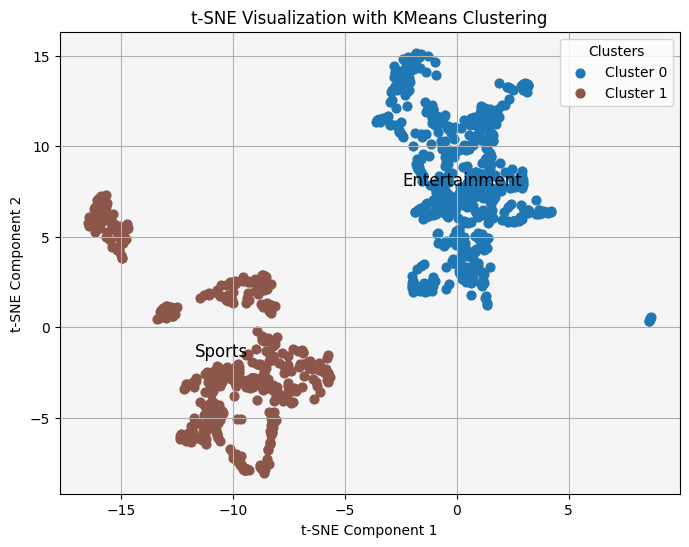

In [ ]:
# Define the number of clusters dynamically based on the unique clusters
num_clusters = len(np.unique(clusters))

# Define a color map
cmap = get_cmap('tab20', num_clusters)

# Assign colors to each cluster
colors = [cmap(i) for i in range(num_clusters)]

# Create a scatter plot with a color for each cluster
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(clusters):
    # Skip clusters that are labeled as 'Unknown'
    category_name_2 = cluster_to_category.get(cluster_id, 'Unknown')
    if category_name_2 == 'Unknown':
        continue  # Skip plotting this cluster

    cluster_points = X_tsne[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=[colors[cluster_id]], label=f"Cluster {cluster_id}", s=40)

# Add cluster labels, skip if 'Unknown'
for cluster_id in np.unique(clusters):
    category_name_2 = cluster_to_category.get(cluster_id, 'Unknown')
    if category_name_2 == 'Unknown':
        continue  # Skip adding label for 'Unknown' clusters

    cluster_center = X_tsne[clusters == cluster_id].mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], category_name_2,
             fontsize=12, color='black', ha='center', va='center')

# Add legend, title, and axis labels
plt.legend(title="Clusters")
plt.title("t-SNE Visualization with KMeans Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.gca().set_facecolor('whitesmoke')
plt.show()


In [ ]:
# Filter out clusters that don't have a valid mapping in the cluster_to_category dictionary
category_names = [
    cluster_to_category[cluster_id] for cluster_id in clusters if cluster_id in cluster_to_category
]

# Count the occurrences of each category
category_counts = Counter(category_names)

# Convert the category counts to a DataFrame
category_counts_df = pd.DataFrame.from_dict(
    category_counts, orient='index', columns=["Count"]
).rename_axis("Category").reset_index()

# Prepare the table data (add headers)
table_data = category_counts_df.values.tolist()
table_data.insert(0, ["Category", "Count"])

# Print the table using tabulate for a clean output
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))


+---------------+---------+
| Category      |   Count |
+===============+=========+
| Entertainment |     690 |
+---------------+---------+
| Sports        |     501 |
+---------------+---------+


## Conclusion

| **Pipeline**                               | **Silhouette Score** | **Key Insights**                                                                 |
|--------------------------------------------|----------------------|----------------------------------------------------------------------------------|
| **Pipeline 1 (TF-IDF + UMAP)**            | 0.6817               | Outperformed Pipeline 2 with better clustering and more distinct clusters.        |
| **Pipeline 2 (CountVectorizer + PCA)**    | 0.2787               | Performed less effectively, suggesting the need for alternative techniques.      |

Both pipelines identified similar clusters: Entertainment, Sports, Politics, and Technology.

**Conclusion**: Pipeline 1 with TF-IDF and UMAP provided better clustering performance, suggesting its superior capability over Pipeline 2.


###References:

[1] S. Jain, S. K. Jain and S. Vasal, "An Effective TF-IDF Model to Improve the Text Classification Performance," 2024 IEEE 13th International Conference on Communication Systems and Network Technologies (CSNT), Jabalpur, India, 2024, pp. 1-4, doi: 10.1109/CSNT60213.2024.10545818. keywords: {Training;Text mining;Measurement;Accuracy;Reviews;Communication systems;Computational modeling;Text-Categorization;Term-Weighting Methods;Text- Mining;TF-IDF},

[2] G. Naresh, J. Sreeja, G. Ramani and G. Vishnu Teja, "Comparative Study of Classification Algorithms on Contrived News," 2023 International Conference on Advanced Computing & Communication Technologies (ICACCTech), Banur, India, 2023, pp. 478-483, doi: 10.1109/ICACCTech61146.2023.00084. keywords: {Social networking (online);Voting;Vectors;Classification algorithms;Reliability;Fake news;Standards;Fake news;LR;SVM;NB Algorithms},

[3] S. Dhir, N. Rastogi, A. Sinha, R. Rani and N. Goel, "News in Vectors: Optimizing News Analysis through Advanced Embeddings and Clustering," 2024 2nd International Conference on Advancement in Computation & Computer Technologies (InCACCT), Gharuan, India, 2024, pp. 40-45, doi: 10.1109/InCACCT61598.2024.10551154. keywords: {Adaptation models;Visualization;Heuristic algorithms;Computational modeling;Pipelines;Clustering algorithms;Transformers;News Documents;Text Clustering;Doc2Vec;Sentence Transformers;Machine Learning;Unsupervised Learning},

[4] F. Miao, P. Zhang, L. Jin and H. Wu, "Chinese News Text Classification Based on Machine Learning Algorithm," 2018 10th International Conference on Intelligent Human-Machine Systems and Cybernetics (IHMSC), Hangzhou, China, 2018, pp. 48-51, doi: 10.1109/IHMSC.2018.10117. keywords: {Text categorization;Classification algorithms;Machine learning algorithms;Training;Support vector machines;Bayes methods;Computational modeling;Chinese text classification;Chinese word segment;Feature extraction;Machine learning algorithm},



